In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Visulaisation and EDA

In [2]:
# Load the dataset
data = pd.read_csv("Data.csv")
data.head()

Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN           9859619.0   
1  893.90  941.38   4581338  4.312765e+14     NaN           1453278.0   
2  884.20  888.09   5124121  4.550658e+14     NaN           1069678.0   
3  921.55  929.17   4609762  4.283257e+14     NaN           1260913.0   
4  969.30  965.65   2977470  2.875200e+14     NaN            816123.0   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4       0.2741

In [3]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [4]:
data.isnull().sum()

Date                       0
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                114848
Deliverable Volume     16077
%Deliverble            16077
dtype: int64

There is non-availability of data related to trades for every Stock before 2012. We have all values available for all stocks after 2012.

In [5]:
data = data[data.Date >= '2012-01-01']
data.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

No NULL values present henceforth

In [6]:
Tickers = data["Symbol"].unique().tolist()
print(Tickers)
print(f"Total Number of Stocks: {len(Tickers)}")

['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEEL']
Total Number of Stocks: 53


There are stock data of 53 stocks present here. But since we are working on NIFTY_50 data, there should only have been 49 stocks (We dont have data on INFRATEL). There are 53 because name of 4 Tickers got changed between the time period of 2012-2021 hence we are receiving these extra 4 Symbols/Tickers. The changed ones are namely: MUNDRAPORT, UNIPHOS, SESAGOA, SSLT

MUNDRAPORT and UNIPHOS were changed due to rebranding of the companies and hence data under these tickers can be used as data under their new Tickers (ADANIPORT and UPL).

In cases like SESAGOA and SSLT, where the companies merged and became part of Vedanta Limited (VEDL), the business fundamentals might have changed. This means that historical data before the merger might not fully represent the current company's operations. So, data under these tickers should be ignored.

In [7]:
symbol_mapping = {
    'MUNDRAPORT': 'ADANIPORTS',
    'UNIPHOS': 'UPL',
}
data['Symbol'] = data['Symbol'].replace(symbol_mapping)
data = data[~data["Symbol"].isin(['SESAGOA', 'SSLT'])]

Tickers = data["Symbol"].unique().tolist()
print(Tickers)
print(f"Total Number of Stocks: {len(Tickers)}")

['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'VEDL', 'WIPRO', 'ZEEL']
Total Number of Stocks: 49


In [8]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, format='mixed')
data.index = data.Date
data = data.drop(columns=["Date"], axis=1)
data.head()

Symbol Series  Prev Close    Open    High    Low   Last  \
Date                                                                      
2012-01-02  ADANIPORTS     EQ      120.05  122.80  123.75  111.0  115.0   
2012-01-03  ADANIPORTS     EQ      114.70  117.50  120.90  115.0  119.6   
2012-01-04  ADANIPORTS     EQ      120.30  121.00  123.50  118.0  122.7   
2012-01-05  ADANIPORTS     EQ      122.85  122.00  127.60  121.3  127.0   
2012-01-06  ADANIPORTS     EQ      126.70  126.25  128.75  124.3  127.0   

             Close    VWAP   Volume      Turnover   Trades  \
Date                                                         
2012-01-02  114.70  115.90  1572363  1.822399e+13  20505.0   
2012-01-03  120.30  118.97  1385662  1.648520e+13  17541.0   
2012-01-04  122.85  120.33  1259249  1.515310e+13  10912.0   
2012-01-05  126.70  125.30   788405  9.878425e+12  10614.0   
2012-01-06  127.70  126.44  1036623  1.310736e+13  11658.0   

            Deliverable Volume  %Deliverble  
Date                                         
2012-01-02            408586.0       0.2599  
2012-01-03            651310.0       0.4700  
2012-01-04            722926.0       0.5741  
2012-01-05            315199.0       0.3998  
2012-01-06            401367.0       0.3872

In [ ]:
import math

# Number of symbols
num_symbols = len(Tickers)

# Set up the grid layout (3 columns)
rows = math.ceil(num_symbols / 6)
cols = 6

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(36, 4 * rows))
fig.suptitle('Closing Prices for Different Symbols', fontsize=20)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot closing prices for each symbol
for i, symbol in enumerate(Tickers):
    # Filter data for the current symbol
    symbol_data = data[data["Symbol"] == symbol]

    # Plot on the corresponding subplot
    axes[i].plot(symbol_data.index.tolist(), symbol_data["Close"], color='blue', linestyle='-', linewidth=1)

    # Adding titles and labels to the current subplot
    axes[i].set_title(f'{symbol} Closing Prices', fontsize=10)
    axes[i].set_xlabel('Date', fontsize=8)
    axes[i].set_ylabel('Closing Price (INR)', fontsize=8)

    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Format the x-axis date labels
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

    # Adding gridlines
    axes[i].grid(visible=True, linestyle='--', alpha=0.5)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


Here it can be seen that there are trends in stock with a sudden decrease in close price. These happen due to external factors which we are not going to model here. So, we might need to have a different eda/ model for these trends than that of regular trends.

Stable Trend Symbols: ['ADANIPORTS', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BHARTIARTL', 'CIPLA', 'COALINDIA', 'DRREDDY', 'HDFC', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'MARUTI', 'NESTLEIND', 'NTPC', 'POWERGRID', 'SHREECEM', 'TATAMOTORS', 'TATASTEEL', 'TITAN', 'ULTRACEMCO', 'VEDL', 'ZEEL']
Sudden Change Symbols: ['ASIANPAINT', 'AXISBANK', 'BAJFINANCE', 'BPCL', 'BRITANNIA', 'BRITANNIA', 'EICHERMOT', 'EICHERMOT', 'GAIL', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'ONGC', 'RELIANCE', 'SBIN', 'SUNPHARMA', 'TCS', 'TCS', 'TECHM', 'UPL', 'UPL', 'WIPRO']


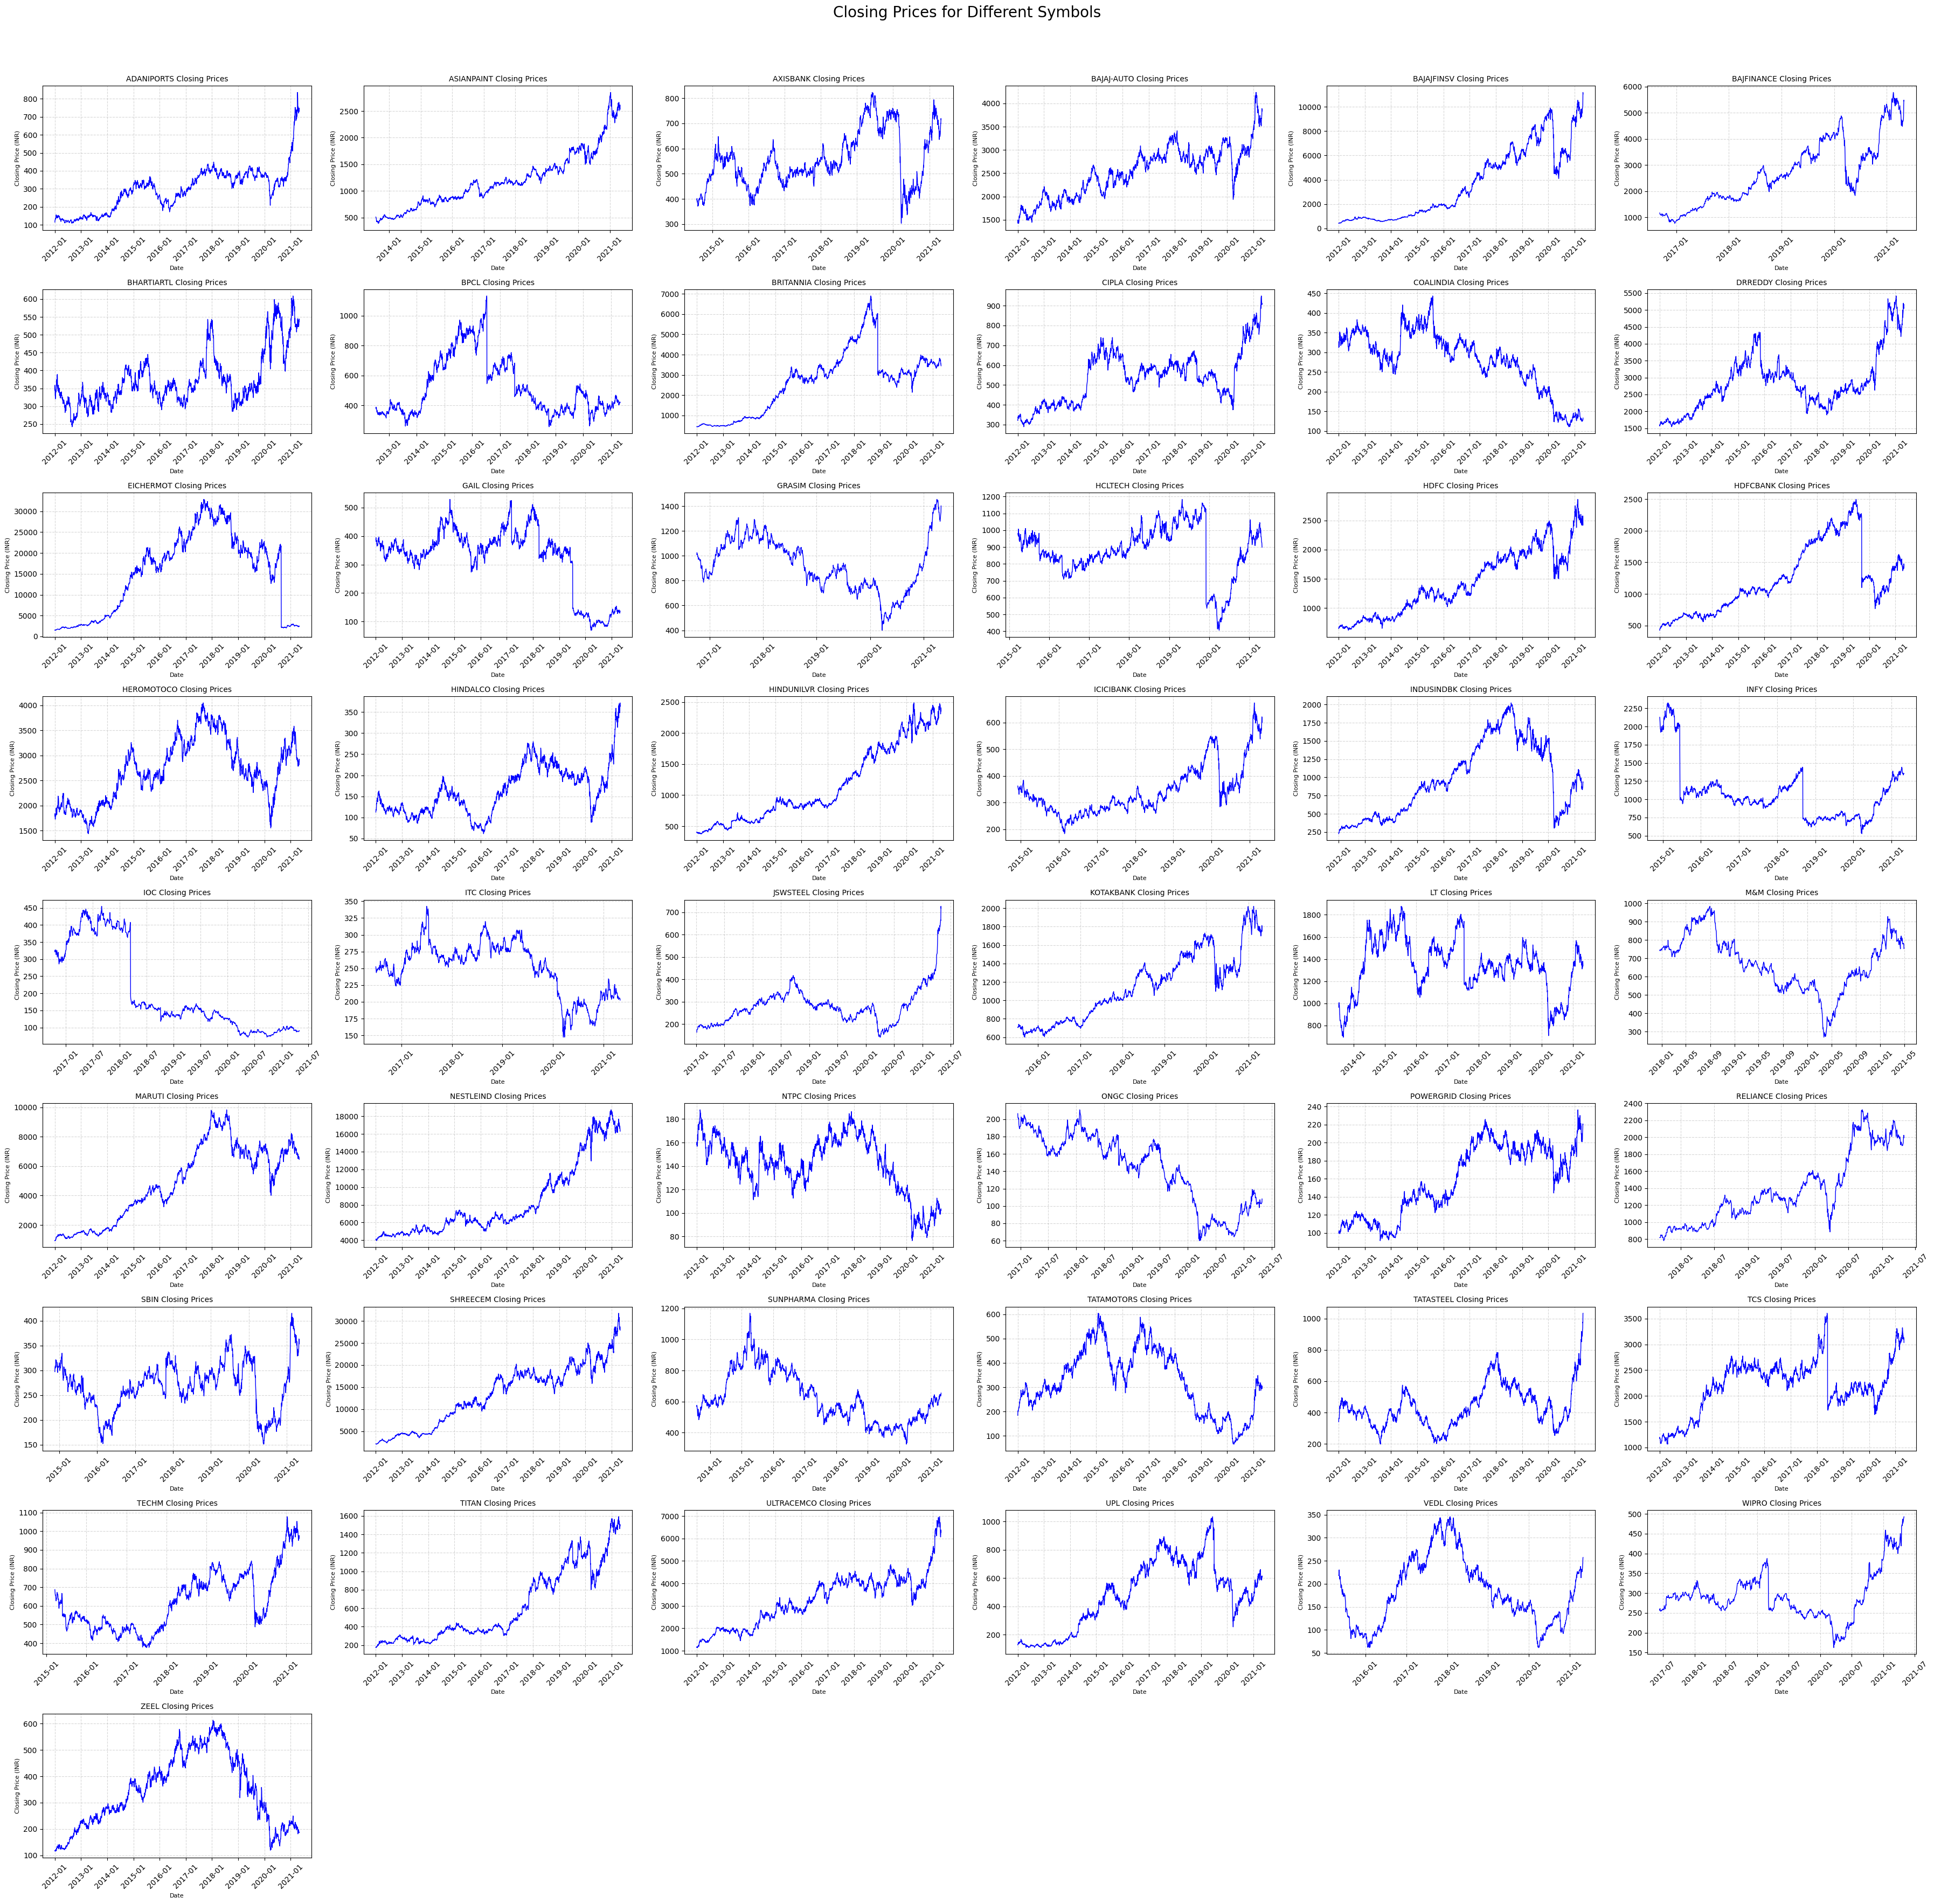

In [ ]:
# Initialize dictionaries to store categorized symbols
stable_trend = []
sudden_changes = []
cutoff_date = pd.Timestamp('2018-01-01')

# Categorization threshold
change_threshold = 0.3

for symbol in Tickers:
    # Get the closing prices for the symbol
    symbol_data = data[data["Symbol"] == symbol]["Close"]
    symbol_data_values = symbol_data.values
    # Calculate percentage changes
    percent_changes = np.diff(symbol_data_values) / symbol_data_values[:-1]

    # Detect the first instance where the change exceeds the threshold
    sudden_change_indices = np.where(np.abs(percent_changes) > change_threshold)[0]

    if sudden_change_indices.size > 0:
        # Get the index of the first sudden change and modify data
        sudden_change_index = sudden_change_indices[0] + 1
        sudden_change_date = symbol_data.index[sudden_change_index]

        # Check if the sudden change date is before the cutoff date
        if sudden_change_date < cutoff_date:
            # Filter out the data for this symbol before the cutoff date
            data = data[(data["Symbol"] != symbol) | (data.index >= sudden_change_date)]
        else:
            sudden_changes.append(symbol)
            
        sudden_changes.append(symbol)
    else:
        stable_trend.append(symbol)

print("Stable Trend Symbols:", stable_trend)
print("Sudden Change Symbols:", sudden_changes)

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(36, 4 * rows))
fig.suptitle('Closing Prices for Different Symbols', fontsize=20)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot closing prices for each symbol
for i, symbol in enumerate(Tickers):
    # Filter data for the current symbol
    symbol_data = data[data["Symbol"] == symbol]

    # Plot on the corresponding subplot
    axes[i].plot(symbol_data.index.tolist(), symbol_data["Close"], color='blue', linestyle='-', linewidth=1)

    # Adding titles and labels to the current subplot
    axes[i].set_title(f'{symbol} Closing Prices', fontsize=10)
    axes[i].set_xlabel('Date', fontsize=8)
    axes[i].set_ylabel('Closing Price (INR)', fontsize=8)

    # Rotate the x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Format the x-axis date labels
    axes[i].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

    # Adding gridlines
    axes[i].grid(visible=True, linestyle='--', alpha=0.5)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()

Here, we are going to perform EDA on one symbol of each trend intsead of a different sets of EDA for all Symbols assuming that all other symbols of same group will behave in similar fashion under EDA.

In [ ]:
data_adaniports = data[data["Symbol"] == 'ADANIPORTS']
data_asianpaints = data[data["Symbol"] == 'ASIANPAINT']

print("ADANIPORTS:")
display(data_adaniports)
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT:")
display(data_asianpaints)

ADANIPORTS:


Symbol Series  Prev Close    Open    High     Low   Last  \
Date                                                                       
2012-01-02  ADANIPORTS     EQ      120.05  122.80  123.75  111.00  115.0   
2012-01-03  ADANIPORTS     EQ      114.70  117.50  120.90  115.00  119.6   
2012-01-04  ADANIPORTS     EQ      120.30  121.00  123.50  118.00  122.7   
2012-01-05  ADANIPORTS     EQ      122.85  122.00  127.60  121.30  127.0   
2012-01-06  ADANIPORTS     EQ      126.70  126.25  128.75  124.30  127.0   
...                ...    ...         ...     ...     ...     ...    ...   
2021-04-26  ADANIPORTS     EQ      725.35  733.00  739.65  728.90  729.2   
2021-04-27  ADANIPORTS     EQ      730.75  735.00  757.50  727.35  748.6   
2021-04-28  ADANIPORTS     EQ      749.15  755.00  760.00  741.10  743.4   
2021-04-29  ADANIPORTS     EQ      746.25  753.20  765.85  743.40  746.4   
2021-04-30  ADANIPORTS     EQ      746.75  739.00  759.45  724.50  726.4   

             Close    VWAP    Volume      Turnover    Trades  \
Date                                                           
2012-01-02  114.70  115.90   1572363  1.822399e+13   20505.0   
2012-01-03  120.30  118.97   1385662  1.648520e+13   17541.0   
2012-01-04  122.85  120.33   1259249  1.515310e+13   10912.0   
2012-01-05  126.70  125.30    788405  9.878425e+12   10614.0   
2012-01-06  127.70  126.44   1036623  1.310736e+13   11658.0   
...            ...     ...       ...           ...       ...   
2021-04-26  730.75  733.25   9390549  6.885658e+14  116457.0   
2021-04-27  749.15  747.67  20573107  1.538191e+15  236896.0   
2021-04-28  746.25  751.02  11156977  8.379106e+14  130847.0   
2021-04-29  746.75  753.06  13851910  1.043139e+15  153293.0   
2021-04-30  730.05  743.35  12600934  9.366911e+14  132141.0   

            Deliverable Volume  %Deliverble  
Date                                         
2012-01-02            408586.0       0.2599  
2012-01-03            651310.0       0.4700  
2012-01-04            722926.0       0.5741  
2012-01-05            315199.0       0.3998  
2012-01-06            401367.0       0.3872  
...                        ...          ...  
2021-04-26            838079.0       0.0892  
2021-04-27           1779639.0       0.0865  
2021-04-28           1342353.0       0.1203  
2021-04-29           1304895.0       0.0942  
2021-04-30           3514692.0       0.2789  

[2311 rows x 14 columns]

___________________________________________________________________________________

ASIANPAINT:


Symbol Series  Prev Close    Open     High      Low     Last  \
Date                                                                           
2013-07-30  ASIANPAINT     EQ     5118.20   521.5   522.40   502.65   512.00   
2013-07-31  ASIANPAINT     EQ      510.75   512.0   513.55   495.15   506.50   
2013-08-01  ASIANPAINT     EQ      507.60   515.0   515.00   486.30   496.65   
2013-08-02  ASIANPAINT     EQ      498.20   499.0   504.15   492.00   496.25   
2013-08-05  ASIANPAINT     EQ      497.45   498.1   500.45   469.00   473.25   
...                ...    ...         ...     ...      ...      ...      ...   
2021-04-26  ASIANPAINT     EQ     2517.95  2530.0  2575.00  2530.00  2558.00   
2021-04-27  ASIANPAINT     EQ     2557.90  2545.0  2579.90  2534.00  2571.00   
2021-04-28  ASIANPAINT     EQ     2574.35  2588.0  2620.25  2575.00  2612.00   
2021-04-29  ASIANPAINT     EQ     2614.55  2630.0  2642.00  2570.00  2613.00   
2021-04-30  ASIANPAINT     EQ     2613.45  2595.0  2605.80  2524.05  2529.00   

              Close     VWAP   Volume      Turnover   Trades  \
Date                                                           
2013-07-30   510.75   513.18   898758  4.612285e+13  32522.0   
2013-07-31   507.60   503.48   800891  4.032322e+13  35371.0   
2013-08-01   498.20   498.91   841361  4.197660e+13  45584.0   
2013-08-02   497.45   496.51   986501  4.898065e+13  53563.0   
2013-08-05   472.80   479.75  1753463  8.412265e+13  76377.0   
...             ...      ...      ...           ...      ...   
2021-04-26  2557.90  2557.47  1103980  2.823400e+14  58557.0   
2021-04-27  2574.35  2560.55   866331  2.218288e+14  66988.0   
2021-04-28  2614.55  2605.91  1065561  2.776752e+14  52622.0   
2021-04-29  2613.45  2607.33  1295346  3.377394e+14  64039.0   
2021-04-30  2536.40  2558.66  1384907  3.543512e+14  91934.0   

            Deliverable Volume  %Deliverble  
Date                                         
2013-07-30            324446.0       0.3610  
2013-07-31            439674.0       0.5490  
2013-08-01            436272.0       0.5185  
2013-08-02            639281.0       0.6480  
2013-08-05            996056.0       0.5681  
...                        ...          ...  
2021-04-26            335232.0       0.3037  
2021-04-27            281178.0       0.3246  
2021-04-28            449241.0       0.4216  
2021-04-29            447979.0       0.3458  
2021-04-30            750496.0       0.5419  

[1914 rows x 14 columns]

In [ ]:
print("ADANIPORTS")
display(data_adaniports.info())
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT")
display(data_asianpaints.info())

ADANIPORTS
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2311 entries, 2012-01-02 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2311 non-null   object 
 1   Series              2311 non-null   object 
 2   Prev Close          2311 non-null   float64
 3   Open                2311 non-null   float64
 4   High                2311 non-null   float64
 5   Low                 2311 non-null   float64
 6   Last                2311 non-null   float64
 7   Close               2311 non-null   float64
 8   VWAP                2311 non-null   float64
 9   Volume              2311 non-null   int64  
 10  Turnover            2311 non-null   float64
 11  Trades              2311 non-null   float64
 12  Deliverable Volume  2311 non-null   float64
 13  %Deliverble         2311 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 270.8+ KB


None

___________________________________________________________________________________

ASIANPAINT
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1914 entries, 2013-07-30 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              1914 non-null   object 
 1   Series              1914 non-null   object 
 2   Prev Close          1914 non-null   float64
 3   Open                1914 non-null   float64
 4   High                1914 non-null   float64
 5   Low                 1914 non-null   float64
 6   Last                1914 non-null   float64
 7   Close               1914 non-null   float64
 8   VWAP                1914 non-null   float64
 9   Volume              1914 non-null   int64  
 10  Turnover            1914 non-null   float64
 11  Trades              1914 non-null   float64
 12  Deliverable Volume  1914 non-null   float64
 13  %Deliverble         1914 non-null   flo

None

In [ ]:
print("ADANIPORTS")
display(data_adaniports.describe())
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT")
display(data_asianpaints.describe())

ADANIPORTS


Prev Close         Open         High          Low         Last  \
count  2311.000000  2311.000000  2311.000000  2311.000000  2311.000000   
mean    292.989139   293.558027   298.253721   288.273756   293.243250   
std     119.845717   120.247096   122.051061   118.152133   120.084791   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     186.225000   187.350000   190.725000   183.025000   186.450000   
50%     309.400000   309.900000   314.800000   304.000000   309.700000   
75%     370.575000   371.000000   375.700000   366.125000   370.575000   
max     835.550000   857.000000   885.000000   817.050000   849.850000   

             Close         VWAP        Volume      Turnover        Trades  \
count  2311.000000  2311.000000  2.311000e+03  2.311000e+03  2.311000e+03   
mean    293.253094   293.406794  3.895282e+06  1.396791e+14  4.693332e+04   
std     120.136059   120.188392  4.521503e+06  3.022608e+14  5.109408e+04   
min     108.000000   108.340000  1.921800e+04  2.415857e+11  3.660000e+02   
25%     186.575000   186.770000  1.772452e+06  4.592122e+13  2.351100e+04   
50%     309.550000   310.110000  2.830268e+06  8.685541e+13  3.777300e+04   
75%     370.700000   371.290000  4.495152e+06  1.403083e+14  5.506200e+04   
max     835.550000   835.160000  9.771788e+07  8.160988e+15  1.205984e+06   

       Deliverable Volume  %Deliverble  
count        2.311000e+03  2311.000000  
mean         1.557204e+06     0.438362  
std          1.439656e+06     0.161116  
min          5.383000e+03     0.067000  
25%          6.683330e+05     0.325000  
50%          1.163334e+06     0.438000  
75%          1.978114e+06     0.547450  
max          2.241652e+07     0.908800

___________________________________________________________________________________

ASIANPAINT


Prev Close         Open         High          Low         Last  \
count  1914.000000  1914.000000  1914.000000  1914.000000  1914.000000   
mean   1191.461076  1191.004310  1204.908386  1175.968312  1190.170010   
std     528.566999   522.195002   528.709456   515.319786   521.947923   
min     392.000000   389.700000   402.850000   373.400000   389.300000   
25%     825.450000   829.500000   837.250000   815.012500   825.112500   
50%    1136.500000  1137.750000  1148.600000  1125.100000  1137.000000   
75%    1434.525000  1437.500000  1455.750000  1425.237500  1436.000000   
max    5118.200000  2849.600000  2873.450000  2824.600000  2846.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  1914.000000  1914.000000  1.914000e+03  1.914000e+03    1914.000000   
mean   1190.112173  1190.215742  1.338519e+06  1.774979e+14   50537.551202   
std     521.791676   521.765939  9.678956e+05  1.971833e+14   36228.427600   
min     392.000000   386.520000  2.430700e+04  1.234079e+12     751.000000   
25%     825.450000   826.817500  7.402280e+05  6.704873e+13   27017.250000   
50%    1136.500000  1136.295000  1.078280e+06  1.094564e+14   40154.000000   
75%    1434.525000  1439.825000  1.600474e+06  2.058913e+14   61402.750000   
max    2849.300000  2848.240000  1.154594e+07  2.216650e+15  351347.000000   

       Deliverable Volume  %Deliverble  
count        1.914000e+03  1914.000000  
mean         6.376672e+05     0.497332  
std          4.565027e+05     0.134548  
min          1.181700e+04     0.076800  
25%          3.554545e+05     0.406350  
50%          5.313235e+05     0.501950  
75%          8.002055e+05     0.590375  
max          7.938427e+06     0.875000

In [ ]:
print("ADANIPORTS")
display(data_adaniports.isnull().sum())
print("___________________________________________________________________________________",end='\n\n')
print("ASIANPAINT")
display(data_asianpaints.isnull().sum())

ADANIPORTS


Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

___________________________________________________________________________________

ASIANPAINT


Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

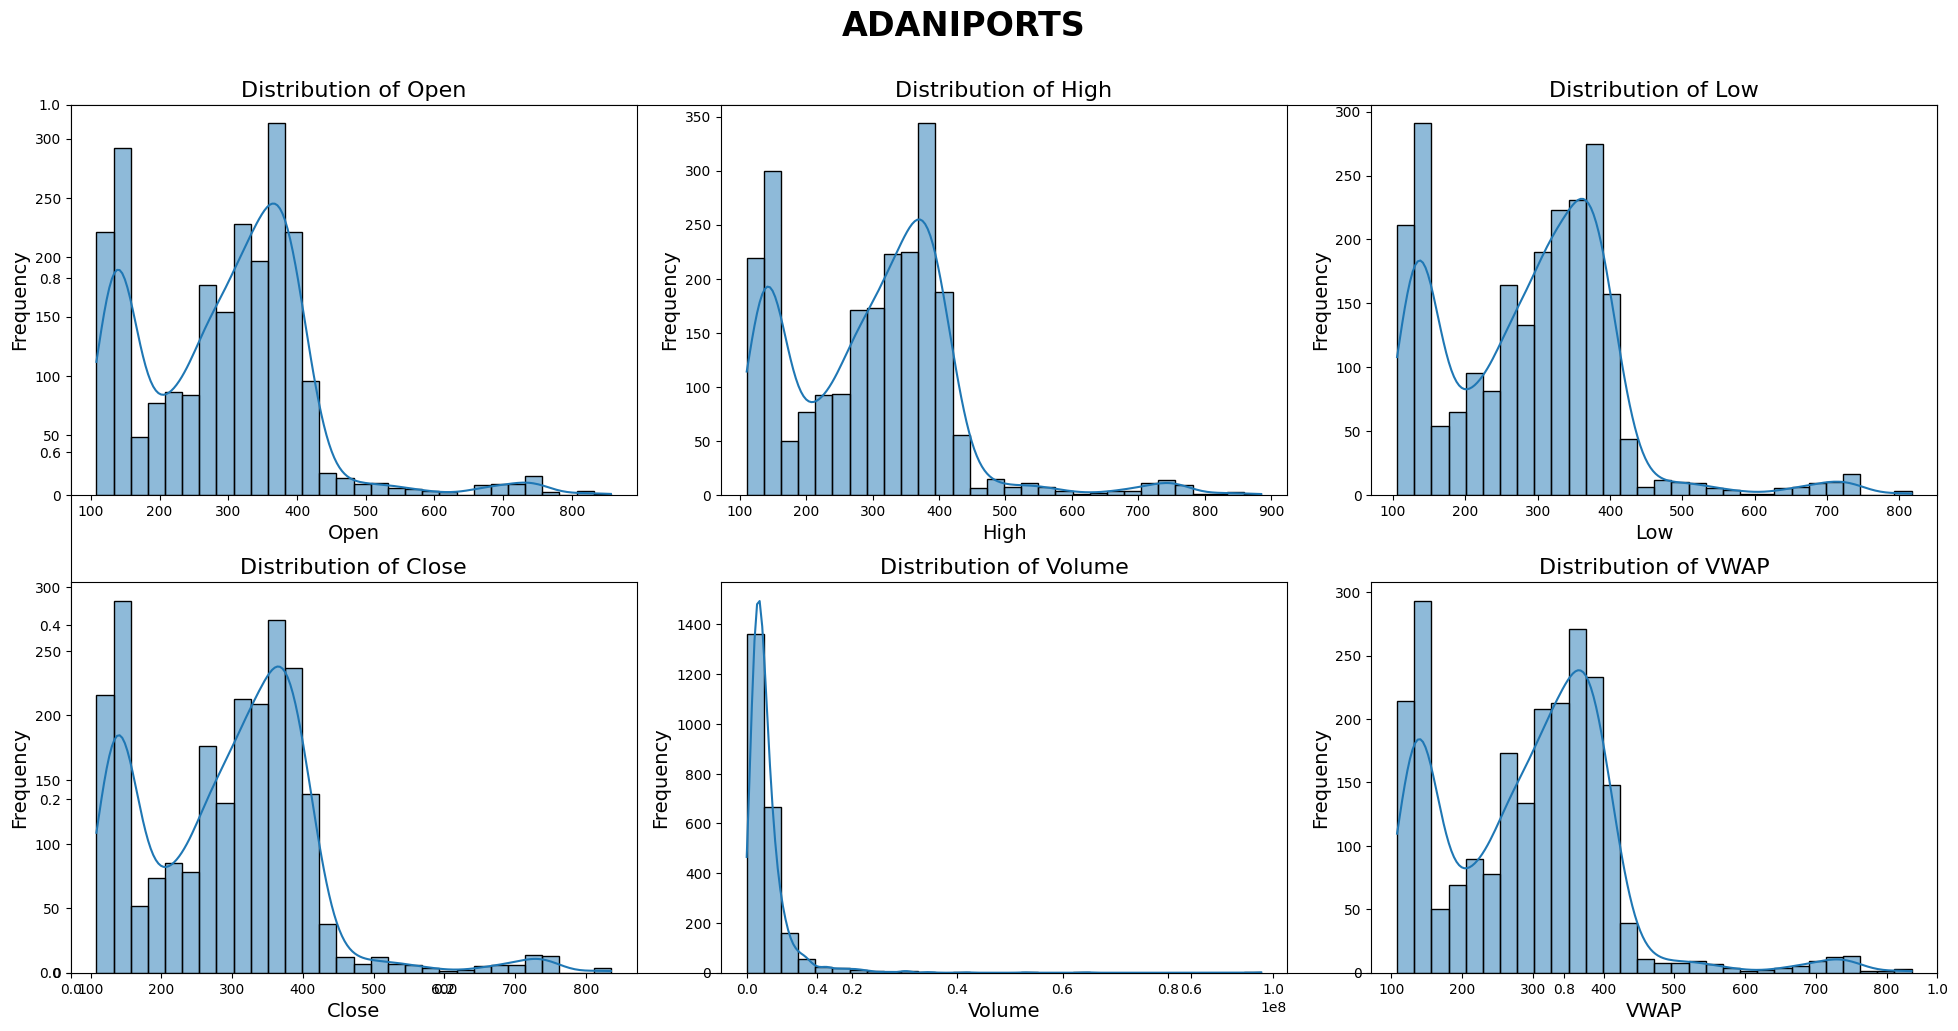

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']

plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.histplot(data_adaniports[col], kde=True, bins=30)  # Using histplot with KDE
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ADANIPORTS', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()

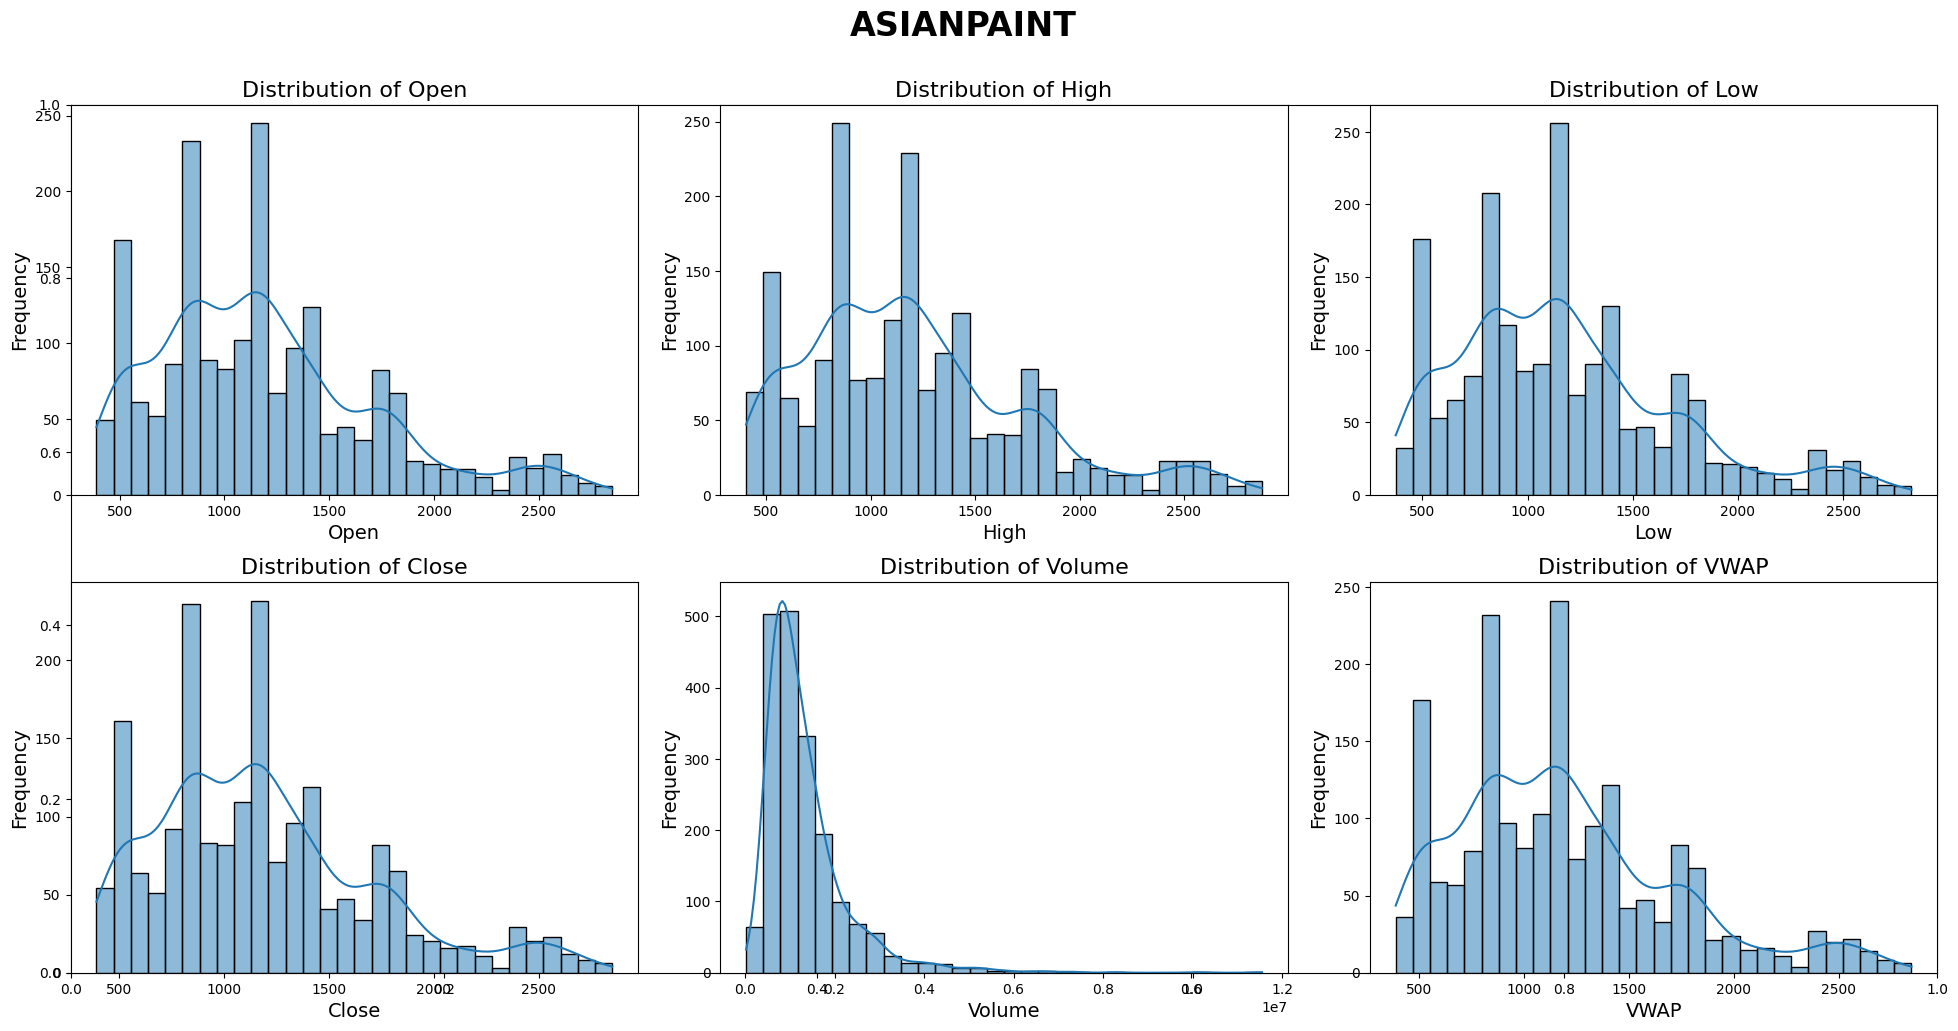

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']

plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.histplot(data_asianpaints[col], kde=True, bins=30)  # Using histplot with KDE
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ASIANPAINT', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()

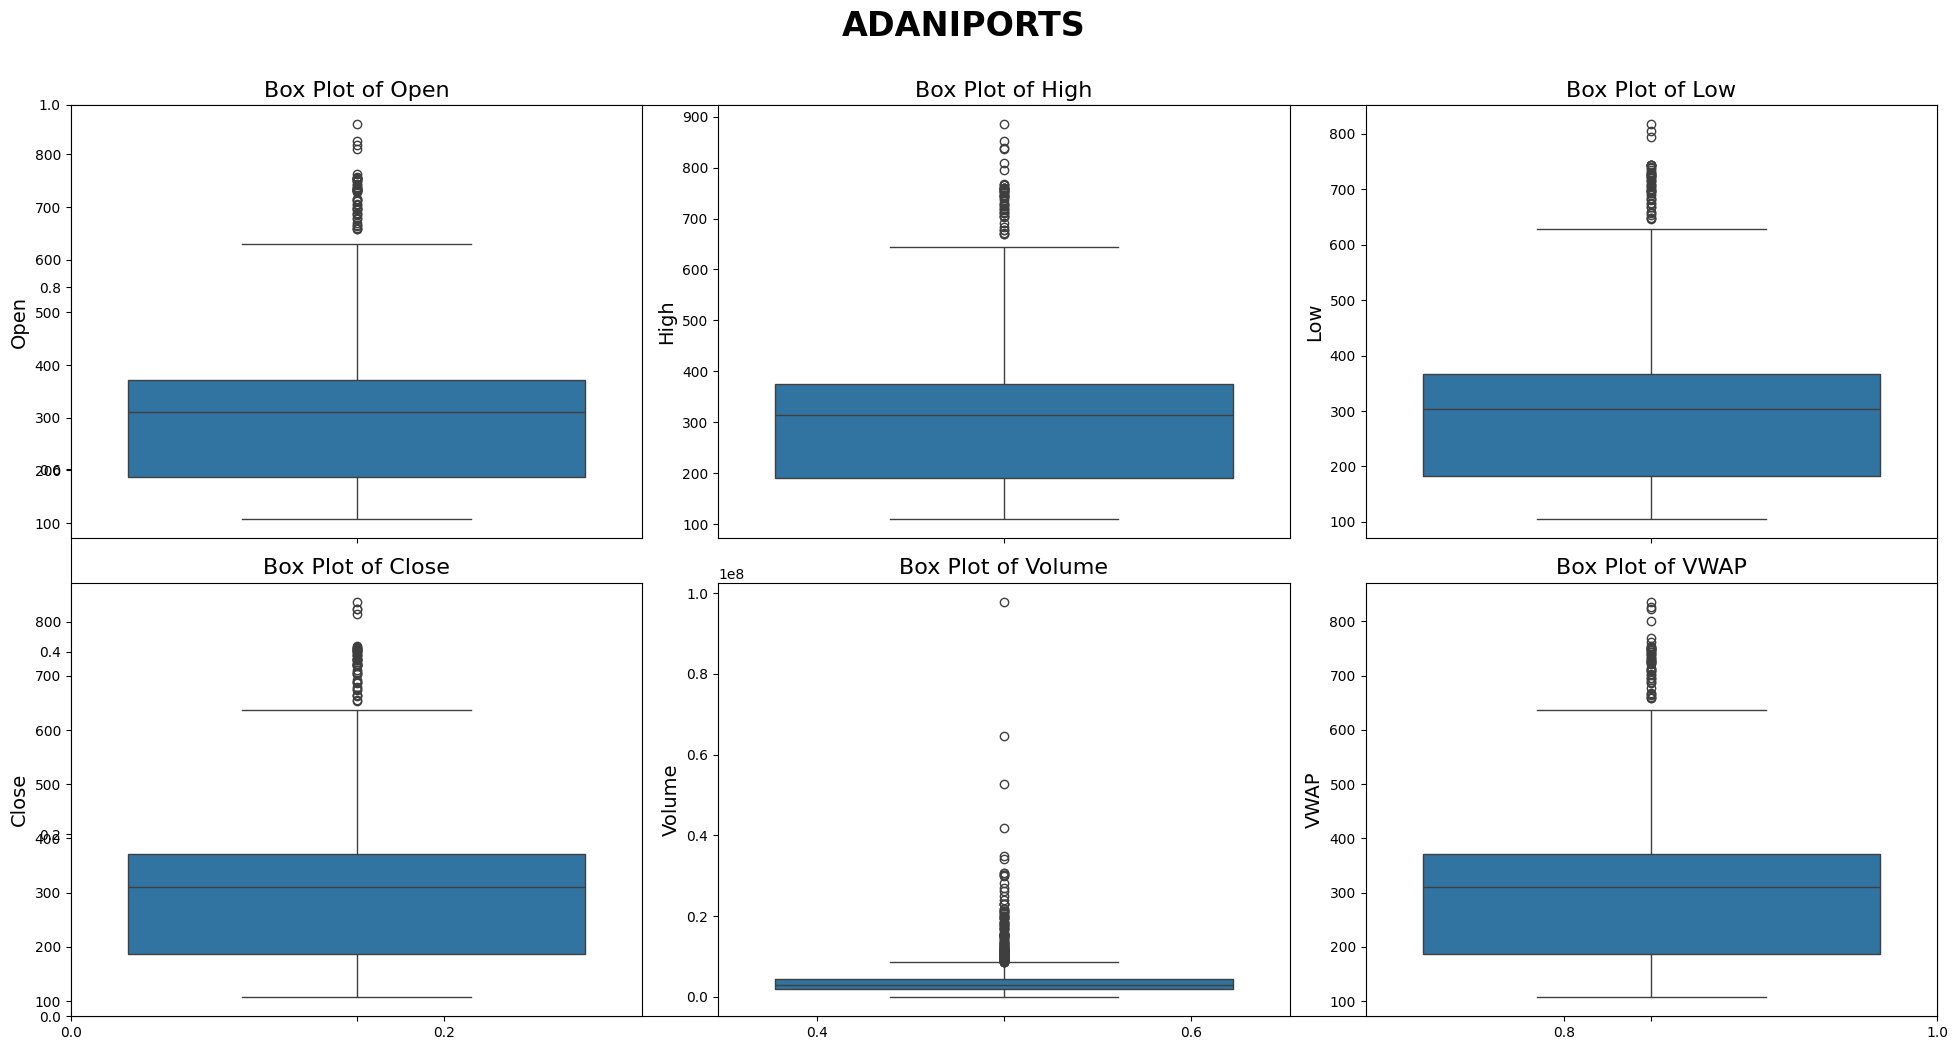

In [ ]:
plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.boxplot(y=data_adaniports[col])  # Use y parameter to specify data
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ADANIPORTS', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()

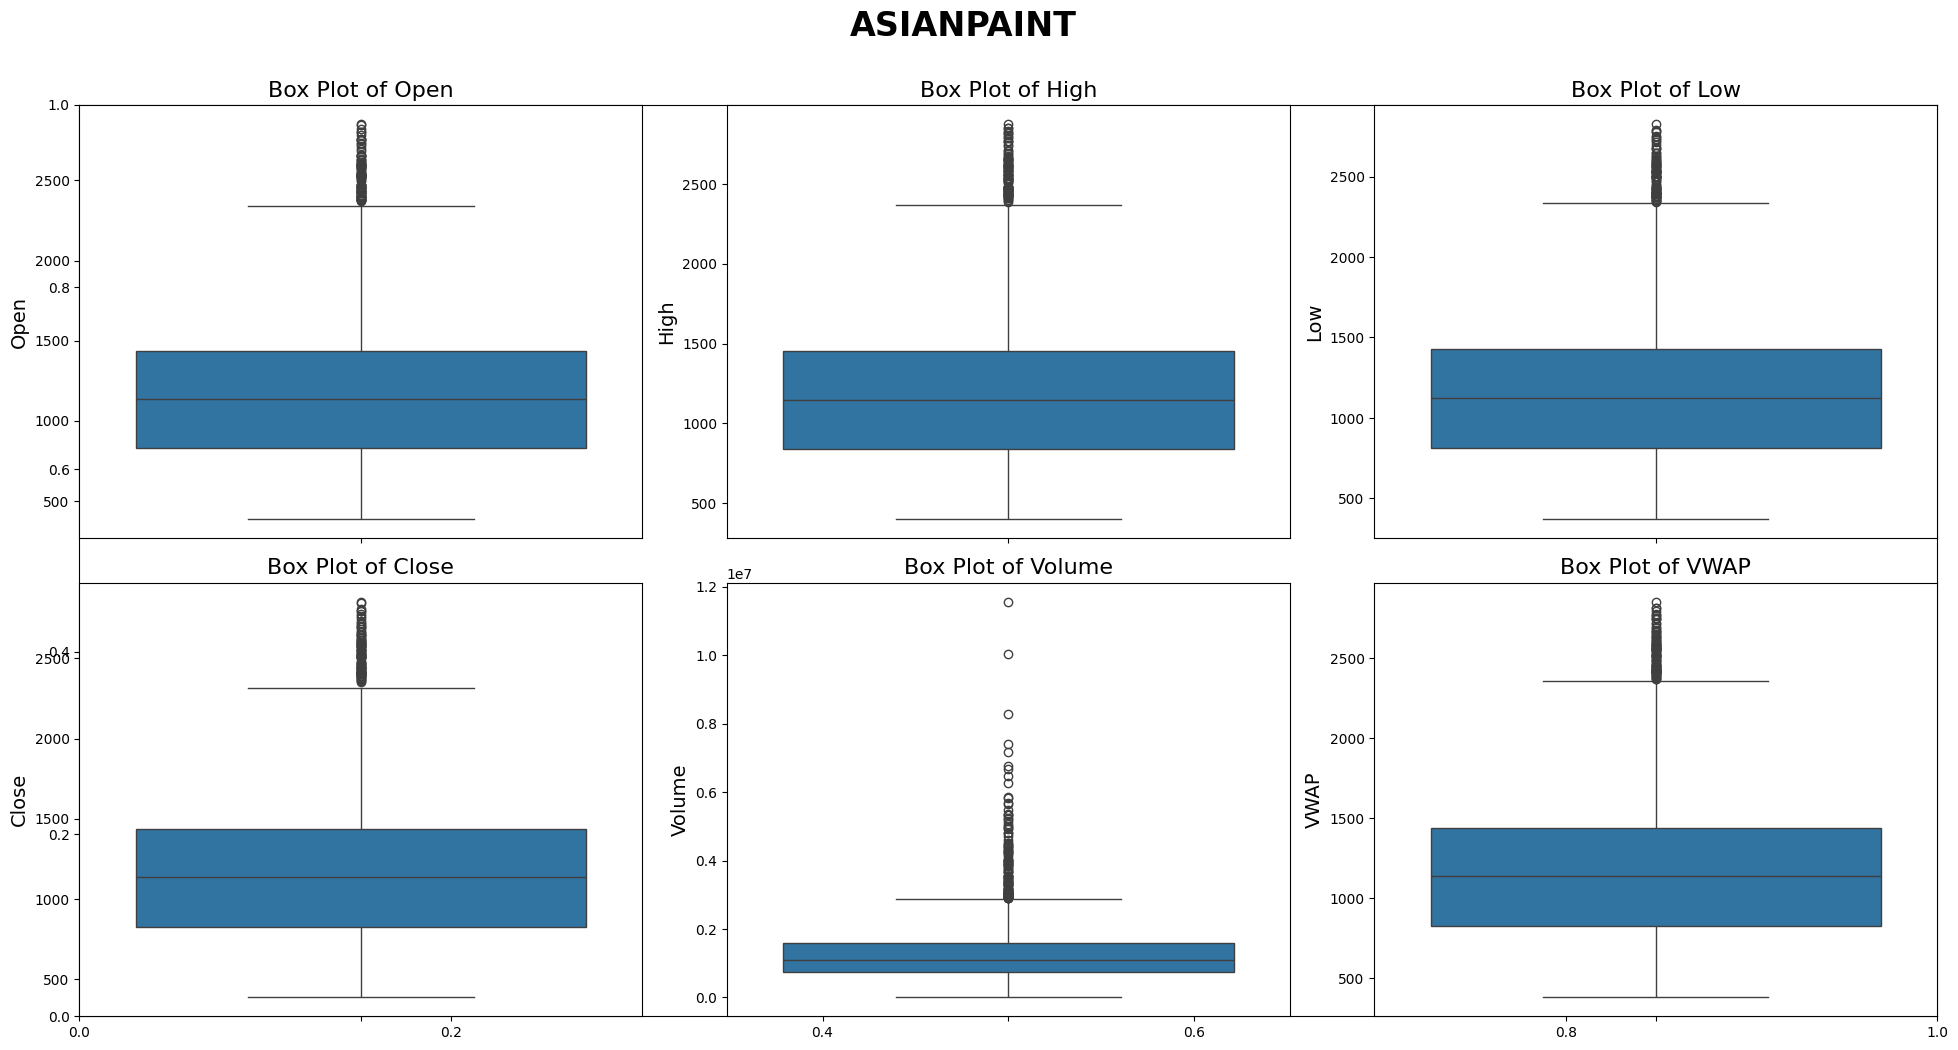

In [ ]:
plt.subplots(figsize=(20, 10))

# Looping through the features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.boxplot(y=data_asianpaints[col])  # Use y parameter to specify data
    plt.title(f'Box Plot of {col}', fontsize=16)
    plt.ylabel(col, fontsize=14)

plt.tight_layout()  # Adjust the layout for better fit
plt.suptitle('ASIANPAINT', fontsize=24, fontweight='bold', y=1.05)  # Add a bigger title
plt.show()

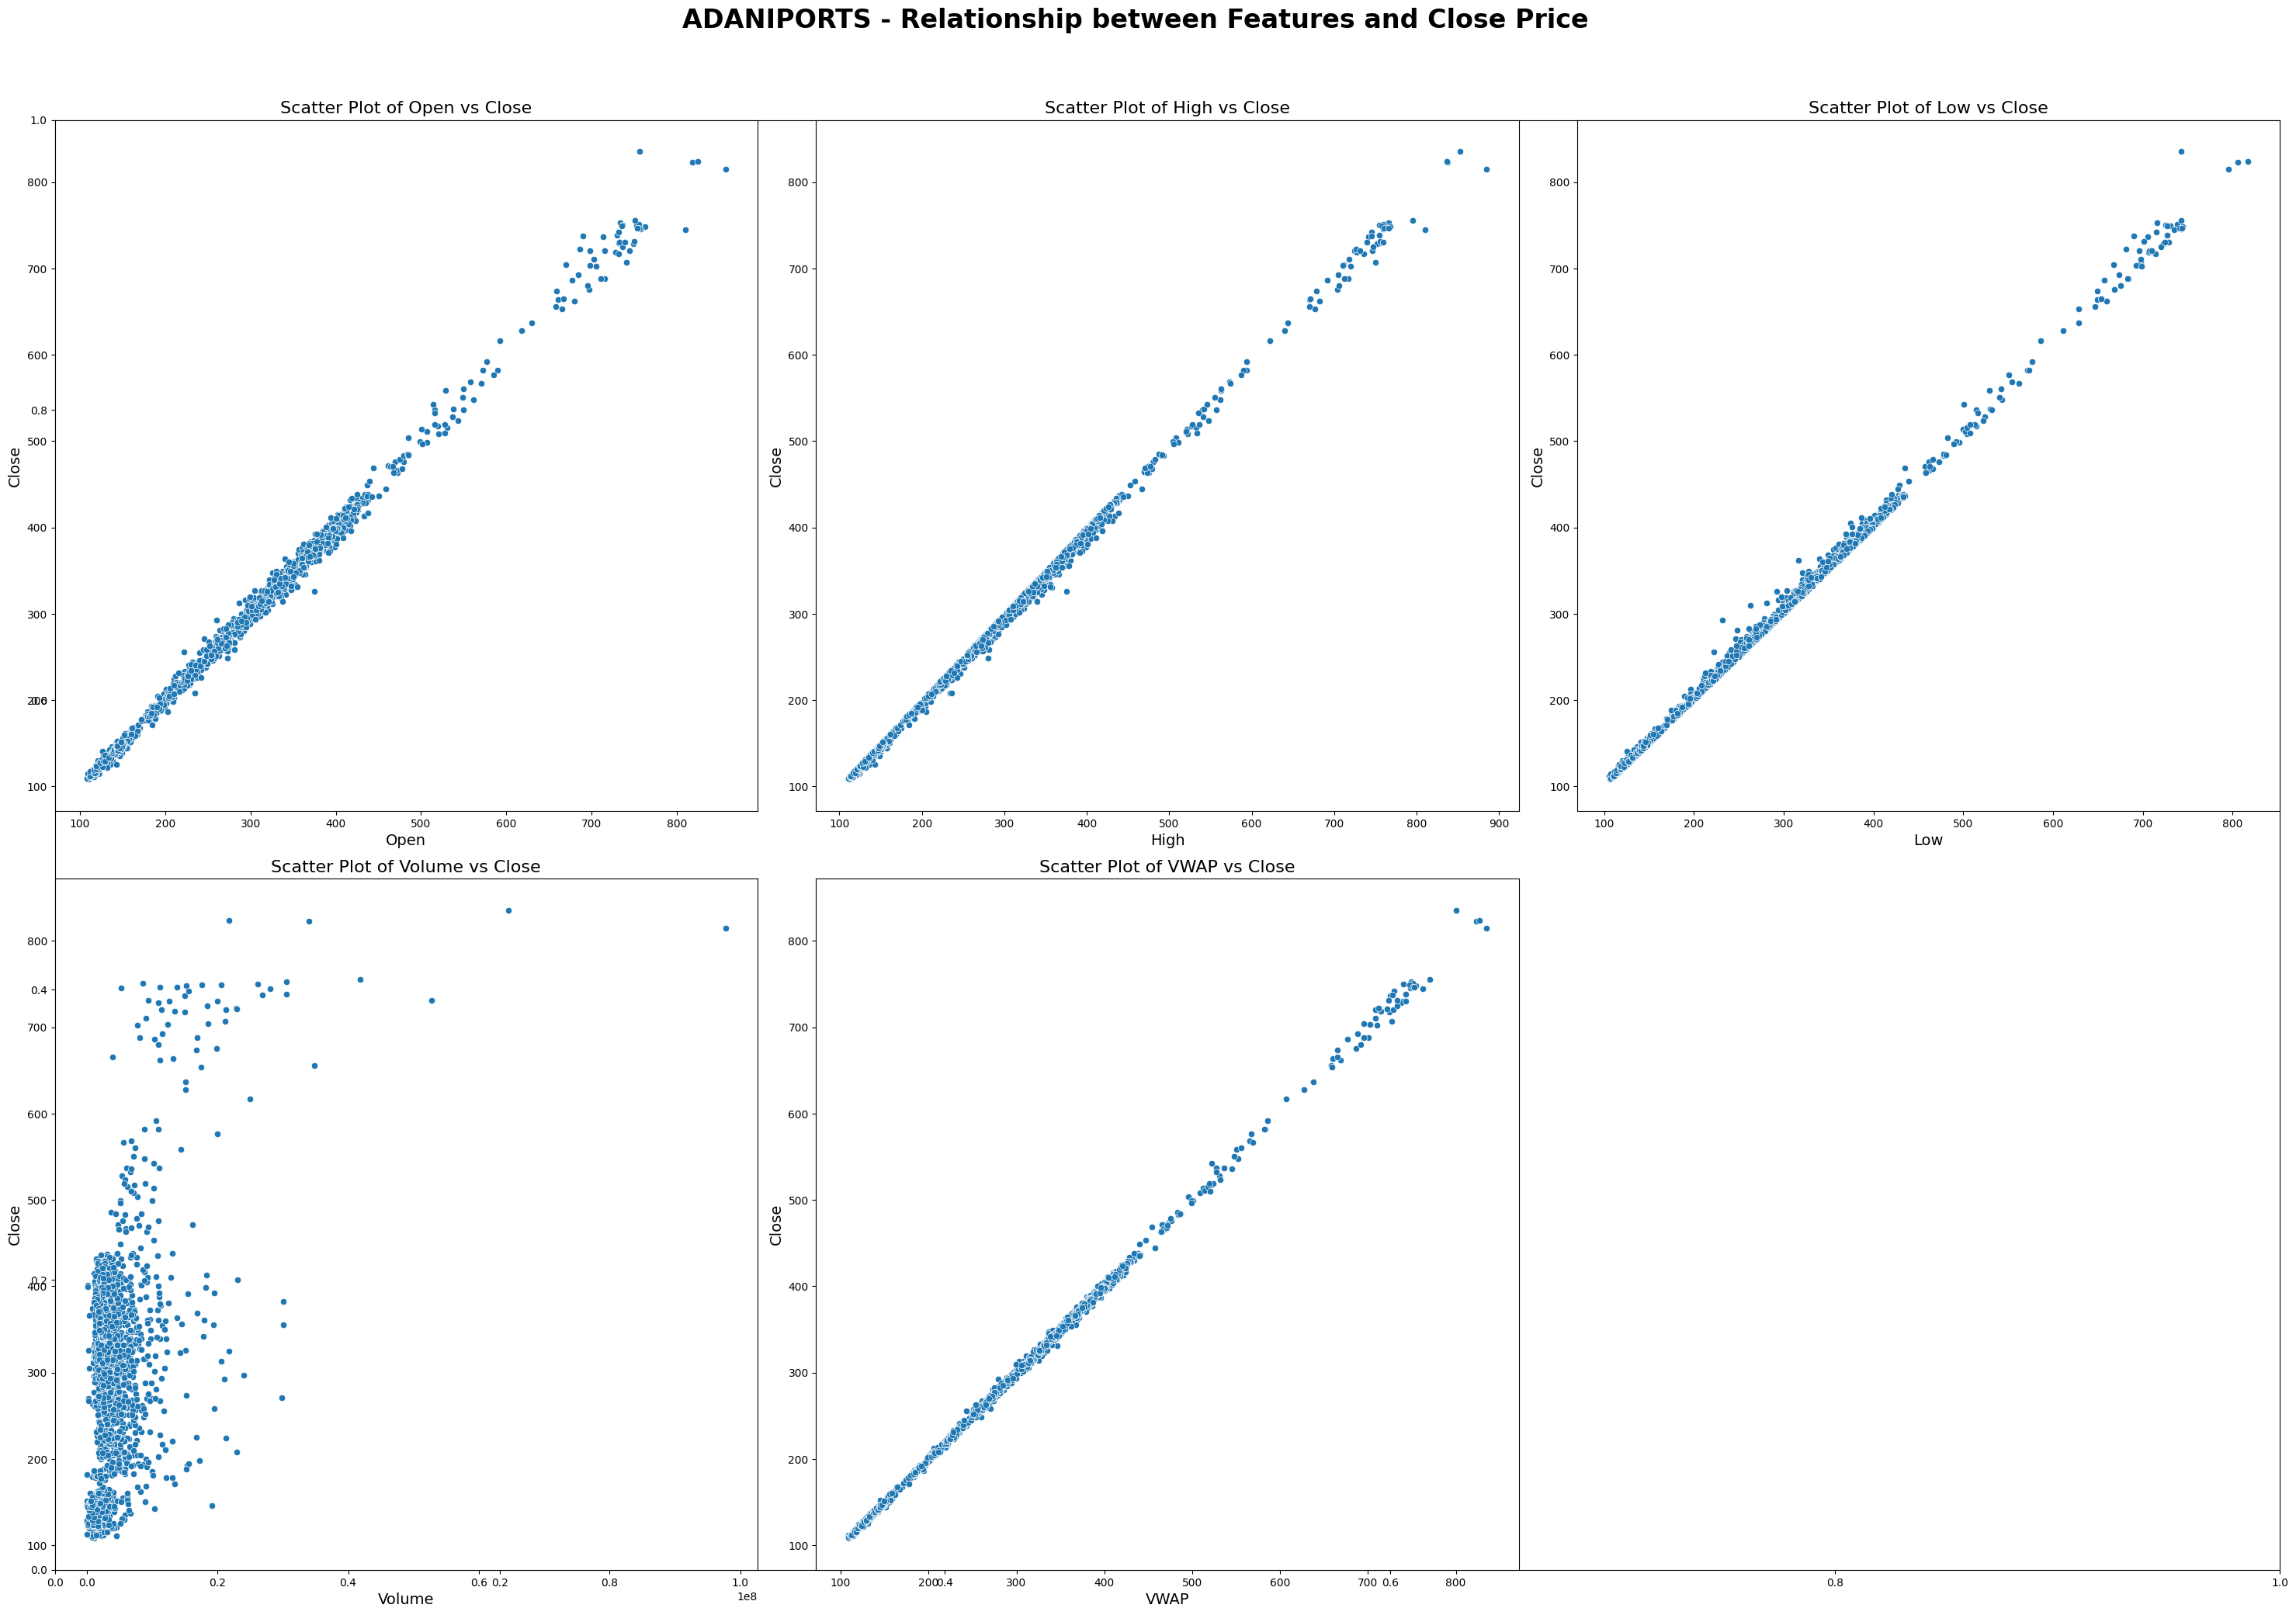

In [ ]:
# Set up the plot area
features = ['Open', 'High', 'Low', 'Volume', 'VWAP']
plt.subplots(figsize=(30, 20))

# Looping through features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.scatterplot(x=col, y='Close', data=data_adaniports)  # Scatter plot for continuous data
    plt.title(f'Scatter Plot of {col} vs Close', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Close', fontsize=14)

plt.tight_layout()  # Adjust layout
plt.suptitle('ADANIPORTS - Relationship between Features and Close Price', fontsize=24, fontweight='bold', y=1.05)
plt.show()


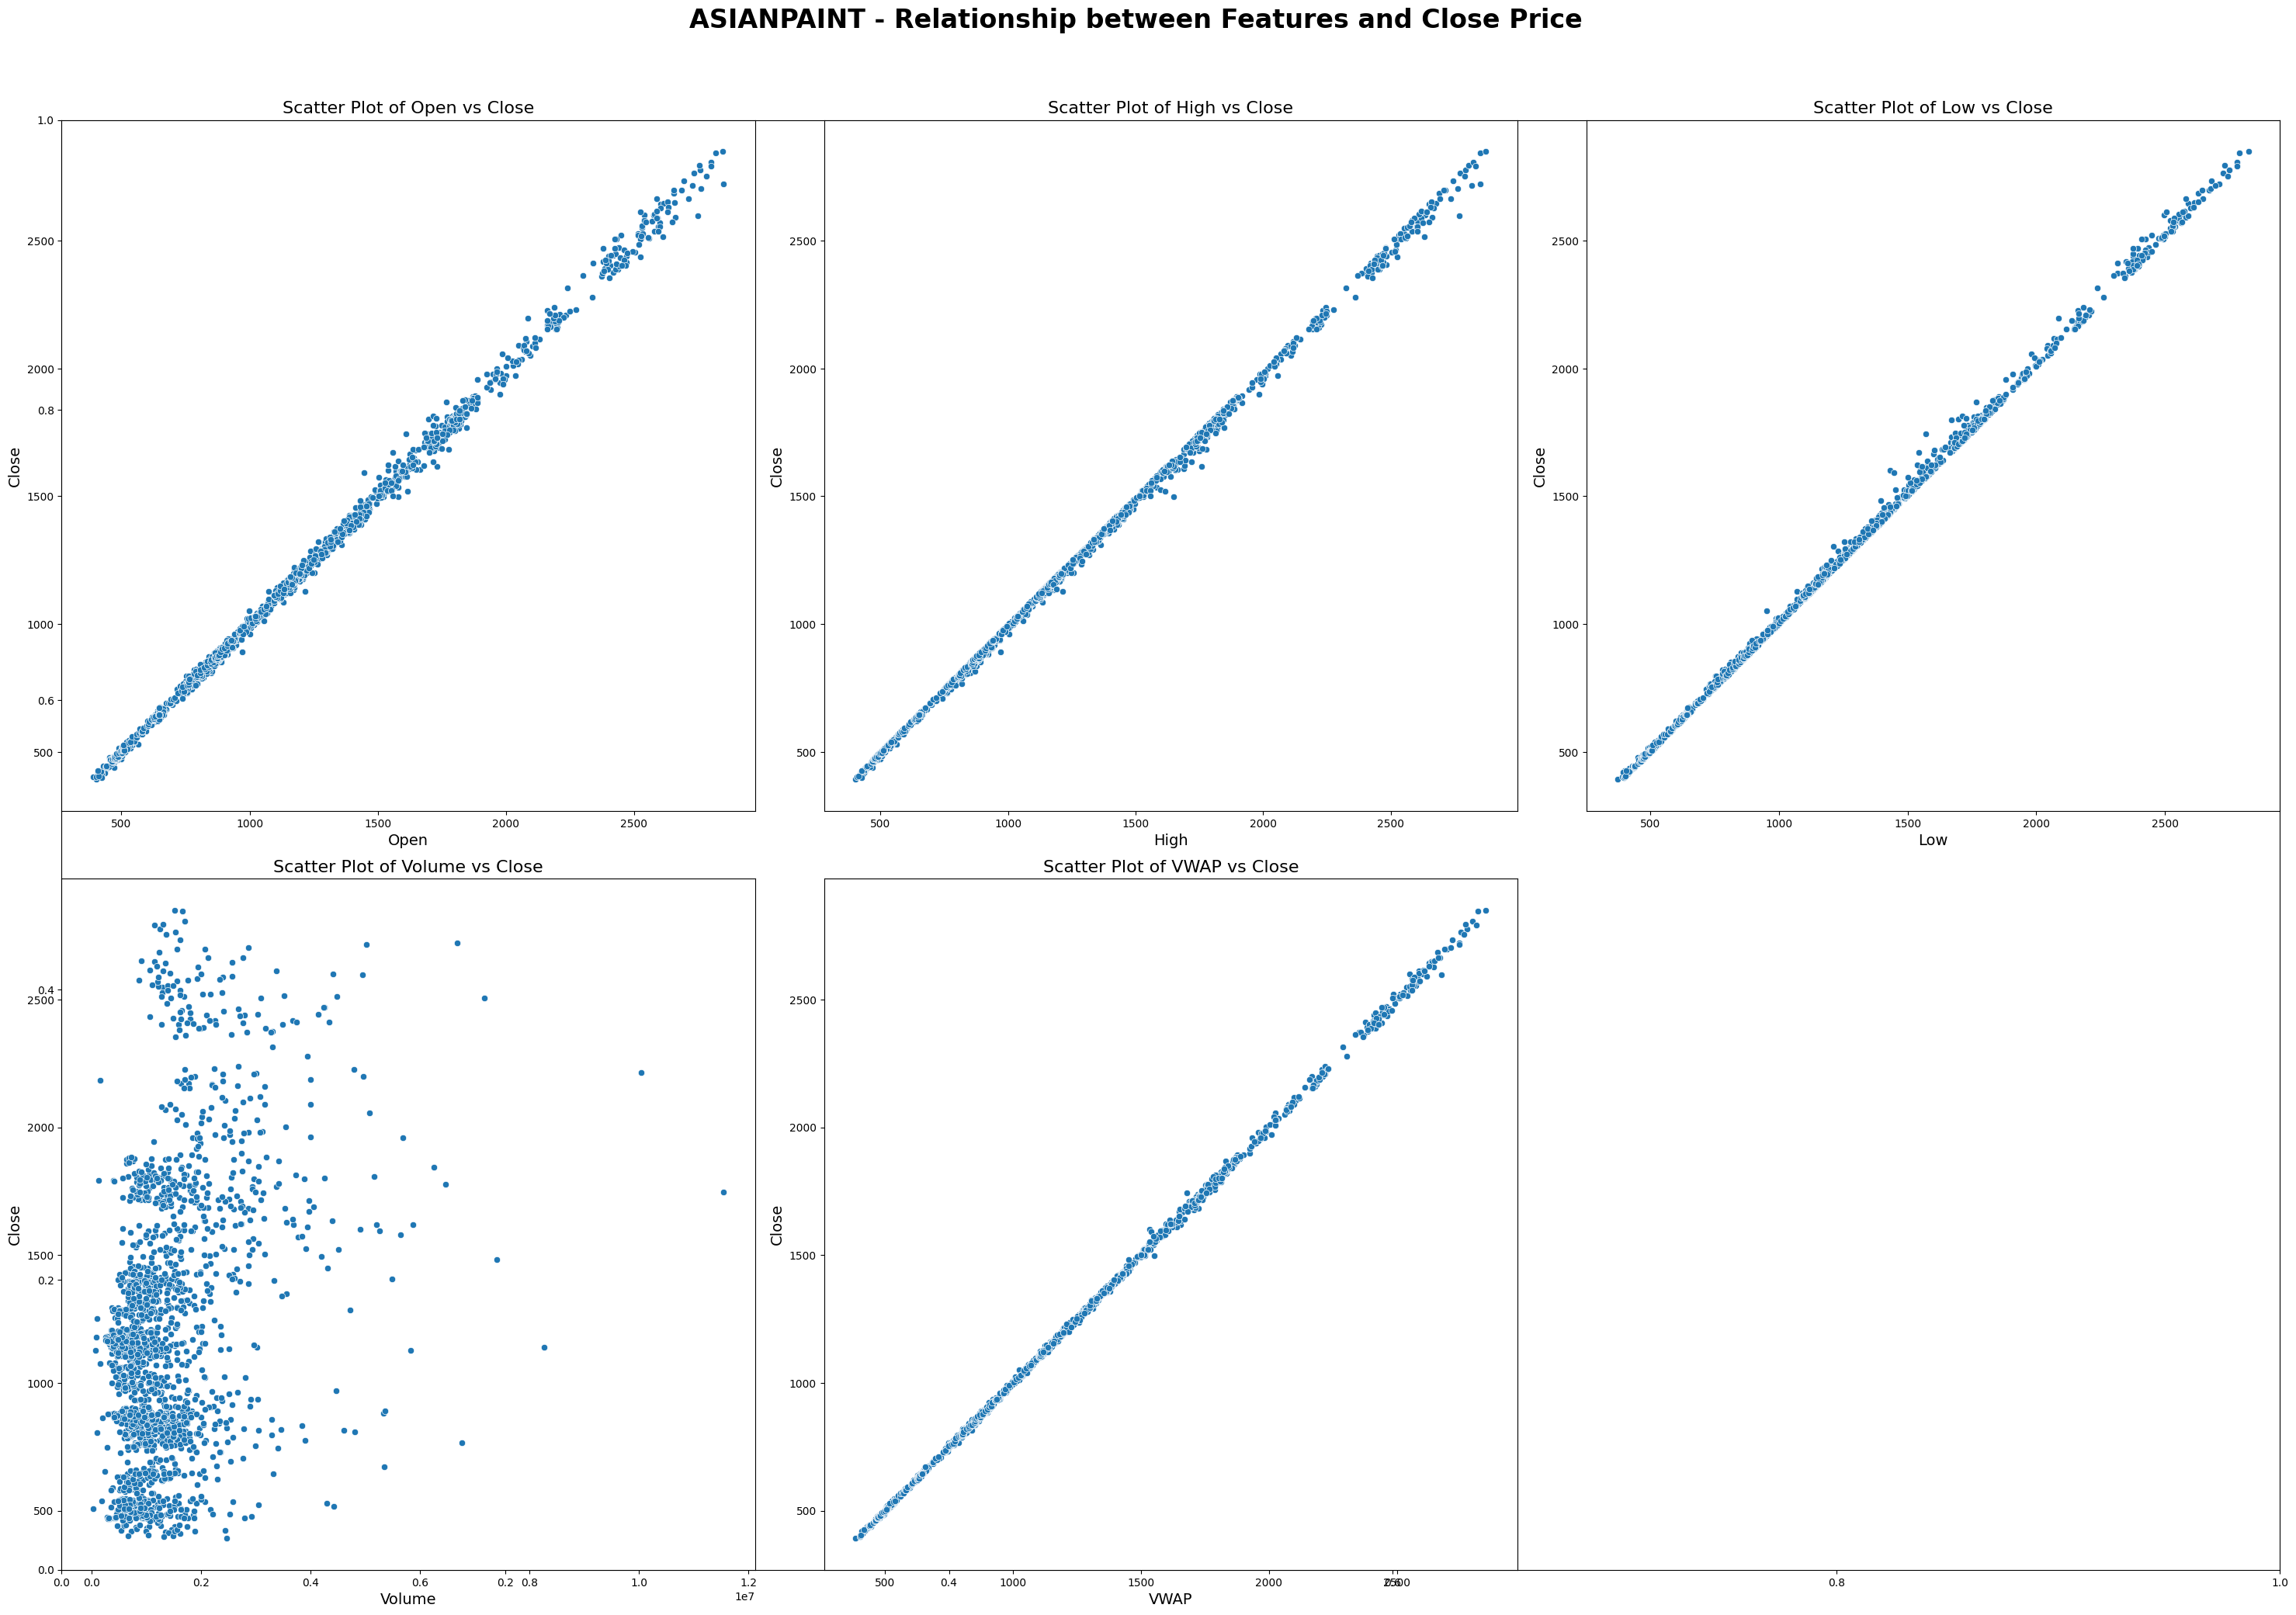

In [ ]:
# Set up the plot area
features = ['Open', 'High', 'Low', 'Volume', 'VWAP']
plt.subplots(figsize=(30, 20))

# Looping through features to create subplots
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid for subplots
    sns.scatterplot(x=col, y='Close', data=data_asianpaints)  # Scatter plot for continuous data
    plt.title(f'Scatter Plot of {col} vs Close', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Close', fontsize=14)

plt.tight_layout()  # Adjust layout
plt.suptitle('ASIANPAINT - Relationship between Features and Close Price', fontsize=24, fontweight='bold', y=1.05)
plt.show()


# Feature Engineering

Lag Features and Moving Averages

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                        
2012-01-27  ADANIPORTS     EQ      143.20  145.80  149.65  144.80  146.75   
2012-01-30  ADANIPORTS     EQ      147.10  147.10  147.40  137.35  138.40   
2012-01-31  ADANIPORTS     EQ      138.40  138.95  148.50  137.00  147.10   
2012-02-01  ADANIPORTS     EQ      146.25  146.55  147.75  142.15  143.40   
2012-02-02  ADANIPORTS     EQ      143.90  144.50  151.80  144.50  151.00   

             Close    VWAP   Volume  ...  Close_lag_4  Close_lag_5  \
Date                                 ...                             
2012-01-27  147.10  147.69  1264483  ...       155.40       149.40   
2012-01-30  138.40  142.13   757694  ...       146.75       155.40   
2012-01-31  146.25  143.17  1291344  ...       150.05       146.75   
2012-02-01  143.90  144.33   899183  ...       143.20       150.05   
2012-02-02  151.00  148.82  2355597  ...       147.10       143.20   

            Close_lag_6  Close_lag_7  Close_lag_8  Close_lag_9  Close_lag_10  \
Date                                                                           
2012-01-27       141.70       140.00        135.5       131.55        132.65   
2012-01-30       149.40       141.70        140.0       135.50        131.55   
2012-01-31       155.40       149.40        141.7       140.00        135.50   
2012-02-01       146.75       155.40        149.4       141.70        140.00   
2012-02-02       150.05       146.75        155.4       149.40        141.70   

             MA_20    MA_50    MA_100  
Date                                   
2012-01-27  148.50  144.065  135.9275  
2012-01-30  145.10  144.750  137.1125  
2012-01-31  145.00  145.825  138.4100  
2012-02-01  143.77  146.215  139.4625  
2012-02-02  145.33  147.145  140.6775  

[5 rows x 27 columns]

Close  Close_lag_1  Close_lag_2  Close_lag_3   MA_20    MA_50  \
Date                                                                         
2012-01-27  147.10       143.20       150.05       146.75  148.50  144.065   
2012-01-30  138.40       147.10       143.20       150.05  145.10  144.750   
2012-01-31  146.25       138.40       147.10       143.20  145.00  145.825   
2012-02-01  143.90       146.25       138.40       147.10  143.77  146.215   
2012-02-02  151.00       143.90       146.25       138.40  145.33  147.145   

              MA_100  
Date                  
2012-01-27  135.9275  
2012-01-30  137.1125  
2012-01-31  138.4100  
2012-02-01  139.4625  
2012-02-02  140.6775

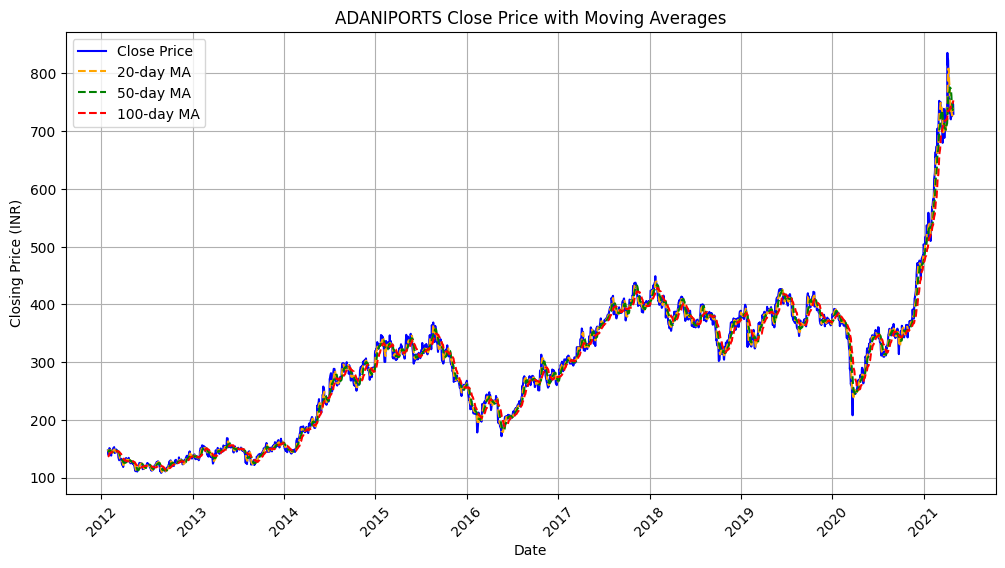

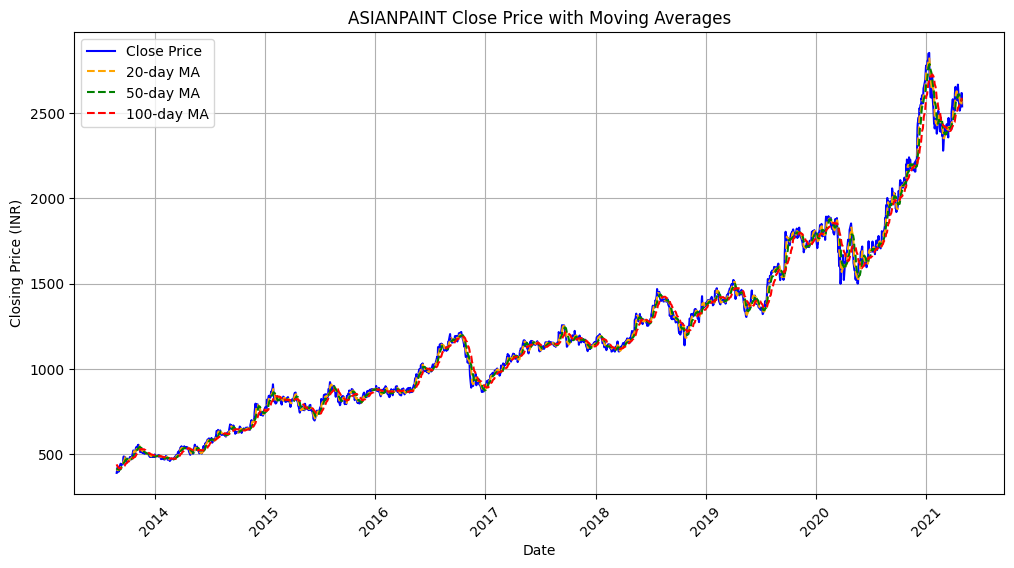

In [ ]:
#Feature engineering using lag features
data_with_features = data.copy()
lag_days=10
for lag in range(1,lag_days+1):
    data_with_features[f'Close_lag_{lag}'] = data_with_features.groupby('Symbol')['Close'].shift(lag)

# Adding rolling window features: Moving averages over different windows (e.g., 5-day, 10-day, 20-day moving average)
data_with_features['MA_20'] = data_with_features.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=5).mean())
data_with_features['MA_50'] = data_with_features.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=10).mean())
data_with_features['MA_100'] = data_with_features.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=20).mean())

# Drop rows with NaN values that were introduced due to lag features
data_with_features.dropna(inplace=True)

# Preview the data with new features
display(data_with_features.head())

# Let's inspect how the lag features look for ADANIPORTS
data_adaniports_features = data_with_features[data_with_features['Symbol'] == 'ADANIPORTS']
display(data_adaniports_features[['Close', 'Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'MA_20', 'MA_50', 'MA_100']].head())

# Visualization of the new features for ADANIPORTS (Rolling averages)
plt.figure(figsize=(12, 6))
plt.plot(data_adaniports_features.index, data_adaniports_features['Close'], label='Close Price', color='blue')
plt.plot(data_adaniports_features.index, data_adaniports_features['MA_20'], label='20-day MA', color='orange', linestyle = '--')
plt.plot(data_adaniports_features.index, data_adaniports_features['MA_50'], label='50-day MA', color='green',linestyle = '--')
plt.plot(data_adaniports_features.index, data_adaniports_features['MA_100'], label='100-day MA', color='red',linestyle = '--')

plt.title('ADANIPORTS Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Same visualization for ASIANPAINT
data_asianpaints_features = data_with_features[data_with_features['Symbol'] == 'ASIANPAINT']

plt.figure(figsize=(12, 6))
plt.plot(data_asianpaints_features.index, data_asianpaints_features['Close'], label='Close Price', color='blue')
plt.plot(data_asianpaints_features.index, data_asianpaints_features['MA_20'], label='20-day MA', color='orange',linestyle = '--')
plt.plot(data_asianpaints_features.index, data_asianpaints_features['MA_50'], label='50-day MA', color='green',linestyle = '--')
plt.plot(data_asianpaints_features.index, data_asianpaints_features['MA_100'], label='100-day MA', color='red',linestyle = '--')

plt.title('ASIANPAINT Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Quater End

In [ ]:
data_with_features['is_quarter_end'] = np.where((data_with_features.index.month)%3==0,1,0)
data_with_features.head()

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                        
2012-01-27  ADANIPORTS     EQ      143.20  145.80  149.65  144.80  146.75   
2012-01-30  ADANIPORTS     EQ      147.10  147.10  147.40  137.35  138.40   
2012-01-31  ADANIPORTS     EQ      138.40  138.95  148.50  137.00  147.10   
2012-02-01  ADANIPORTS     EQ      146.25  146.55  147.75  142.15  143.40   
2012-02-02  ADANIPORTS     EQ      143.90  144.50  151.80  144.50  151.00   

             Close    VWAP   Volume  ...  Close_lag_5  Close_lag_6  \
Date                                 ...                             
2012-01-27  147.10  147.69  1264483  ...       149.40       141.70   
2012-01-30  138.40  142.13   757694  ...       155.40       149.40   
2012-01-31  146.25  143.17  1291344  ...       146.75       155.40   
2012-02-01  143.90  144.33   899183  ...       150.05       146.75   
2012-02-02  151.00  148.82  2355597  ...       143.20       150.05   

            Close_lag_7  Close_lag_8  Close_lag_9  Close_lag_10   MA_20  \
Date                                                                      
2012-01-27       140.00        135.5       131.55        132.65  148.50   
2012-01-30       141.70        140.0       135.50        131.55  145.10   
2012-01-31       149.40        141.7       140.00        135.50  145.00   
2012-02-01       155.40        149.4       141.70        140.00  143.77   
2012-02-02       146.75        155.4       149.40        141.70  145.33   

              MA_50    MA_100  is_quarter_end  
Date                                           
2012-01-27  144.065  135.9275               0  
2012-01-30  144.750  137.1125               0  
2012-01-31  145.825  138.4100               0  
2012-02-01  146.215  139.4625               0  
2012-02-02  147.145  140.6775               0  

[5 rows x 28 columns]

In [ ]:
data_with_features[data_with_features["Symbol"] == 'ADANIPORTS'].groupby('is_quarter_end').Close.mean()

is_quarter_end
0    294.630537
1    294.425914
Name: Close, dtype: float64

In [ ]:
data_with_features[data_with_features["Symbol"] == 'ASIANPAINT'].groupby('is_quarter_end').Close.mean()

is_quarter_end
0    1204.512790
1    1184.134161
Name: Close, dtype: float64

Seasonal Trends

In [ ]:
data_with_features['Day'] = data_with_features.index.day
data_with_features['Month'] = data_with_features.index.month

data_with_features.head()

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                        
2012-01-27  ADANIPORTS     EQ      143.20  145.80  149.65  144.80  146.75   
2012-01-30  ADANIPORTS     EQ      147.10  147.10  147.40  137.35  138.40   
2012-01-31  ADANIPORTS     EQ      138.40  138.95  148.50  137.00  147.10   
2012-02-01  ADANIPORTS     EQ      146.25  146.55  147.75  142.15  143.40   
2012-02-02  ADANIPORTS     EQ      143.90  144.50  151.80  144.50  151.00   

             Close    VWAP   Volume  ...  Close_lag_7  Close_lag_8  \
Date                                 ...                             
2012-01-27  147.10  147.69  1264483  ...       140.00        135.5   
2012-01-30  138.40  142.13   757694  ...       141.70        140.0   
2012-01-31  146.25  143.17  1291344  ...       149.40        141.7   
2012-02-01  143.90  144.33   899183  ...       155.40        149.4   
2012-02-02  151.00  148.82  2355597  ...       146.75        155.4   

            Close_lag_9  Close_lag_10   MA_20    MA_50    MA_100  \
Date                                                               
2012-01-27       131.55        132.65  148.50  144.065  135.9275   
2012-01-30       135.50        131.55  145.10  144.750  137.1125   
2012-01-31       140.00        135.50  145.00  145.825  138.4100   
2012-02-01       141.70        140.00  143.77  146.215  139.4625   
2012-02-02       149.40        141.70  145.33  147.145  140.6775   

            is_quarter_end  Day  Month  
Date                                    
2012-01-27               0   27      1  
2012-01-30               0   30      1  
2012-01-31               0   31      1  
2012-02-01               0    1      2  
2012-02-02               0    2      2  

[5 rows x 30 columns]

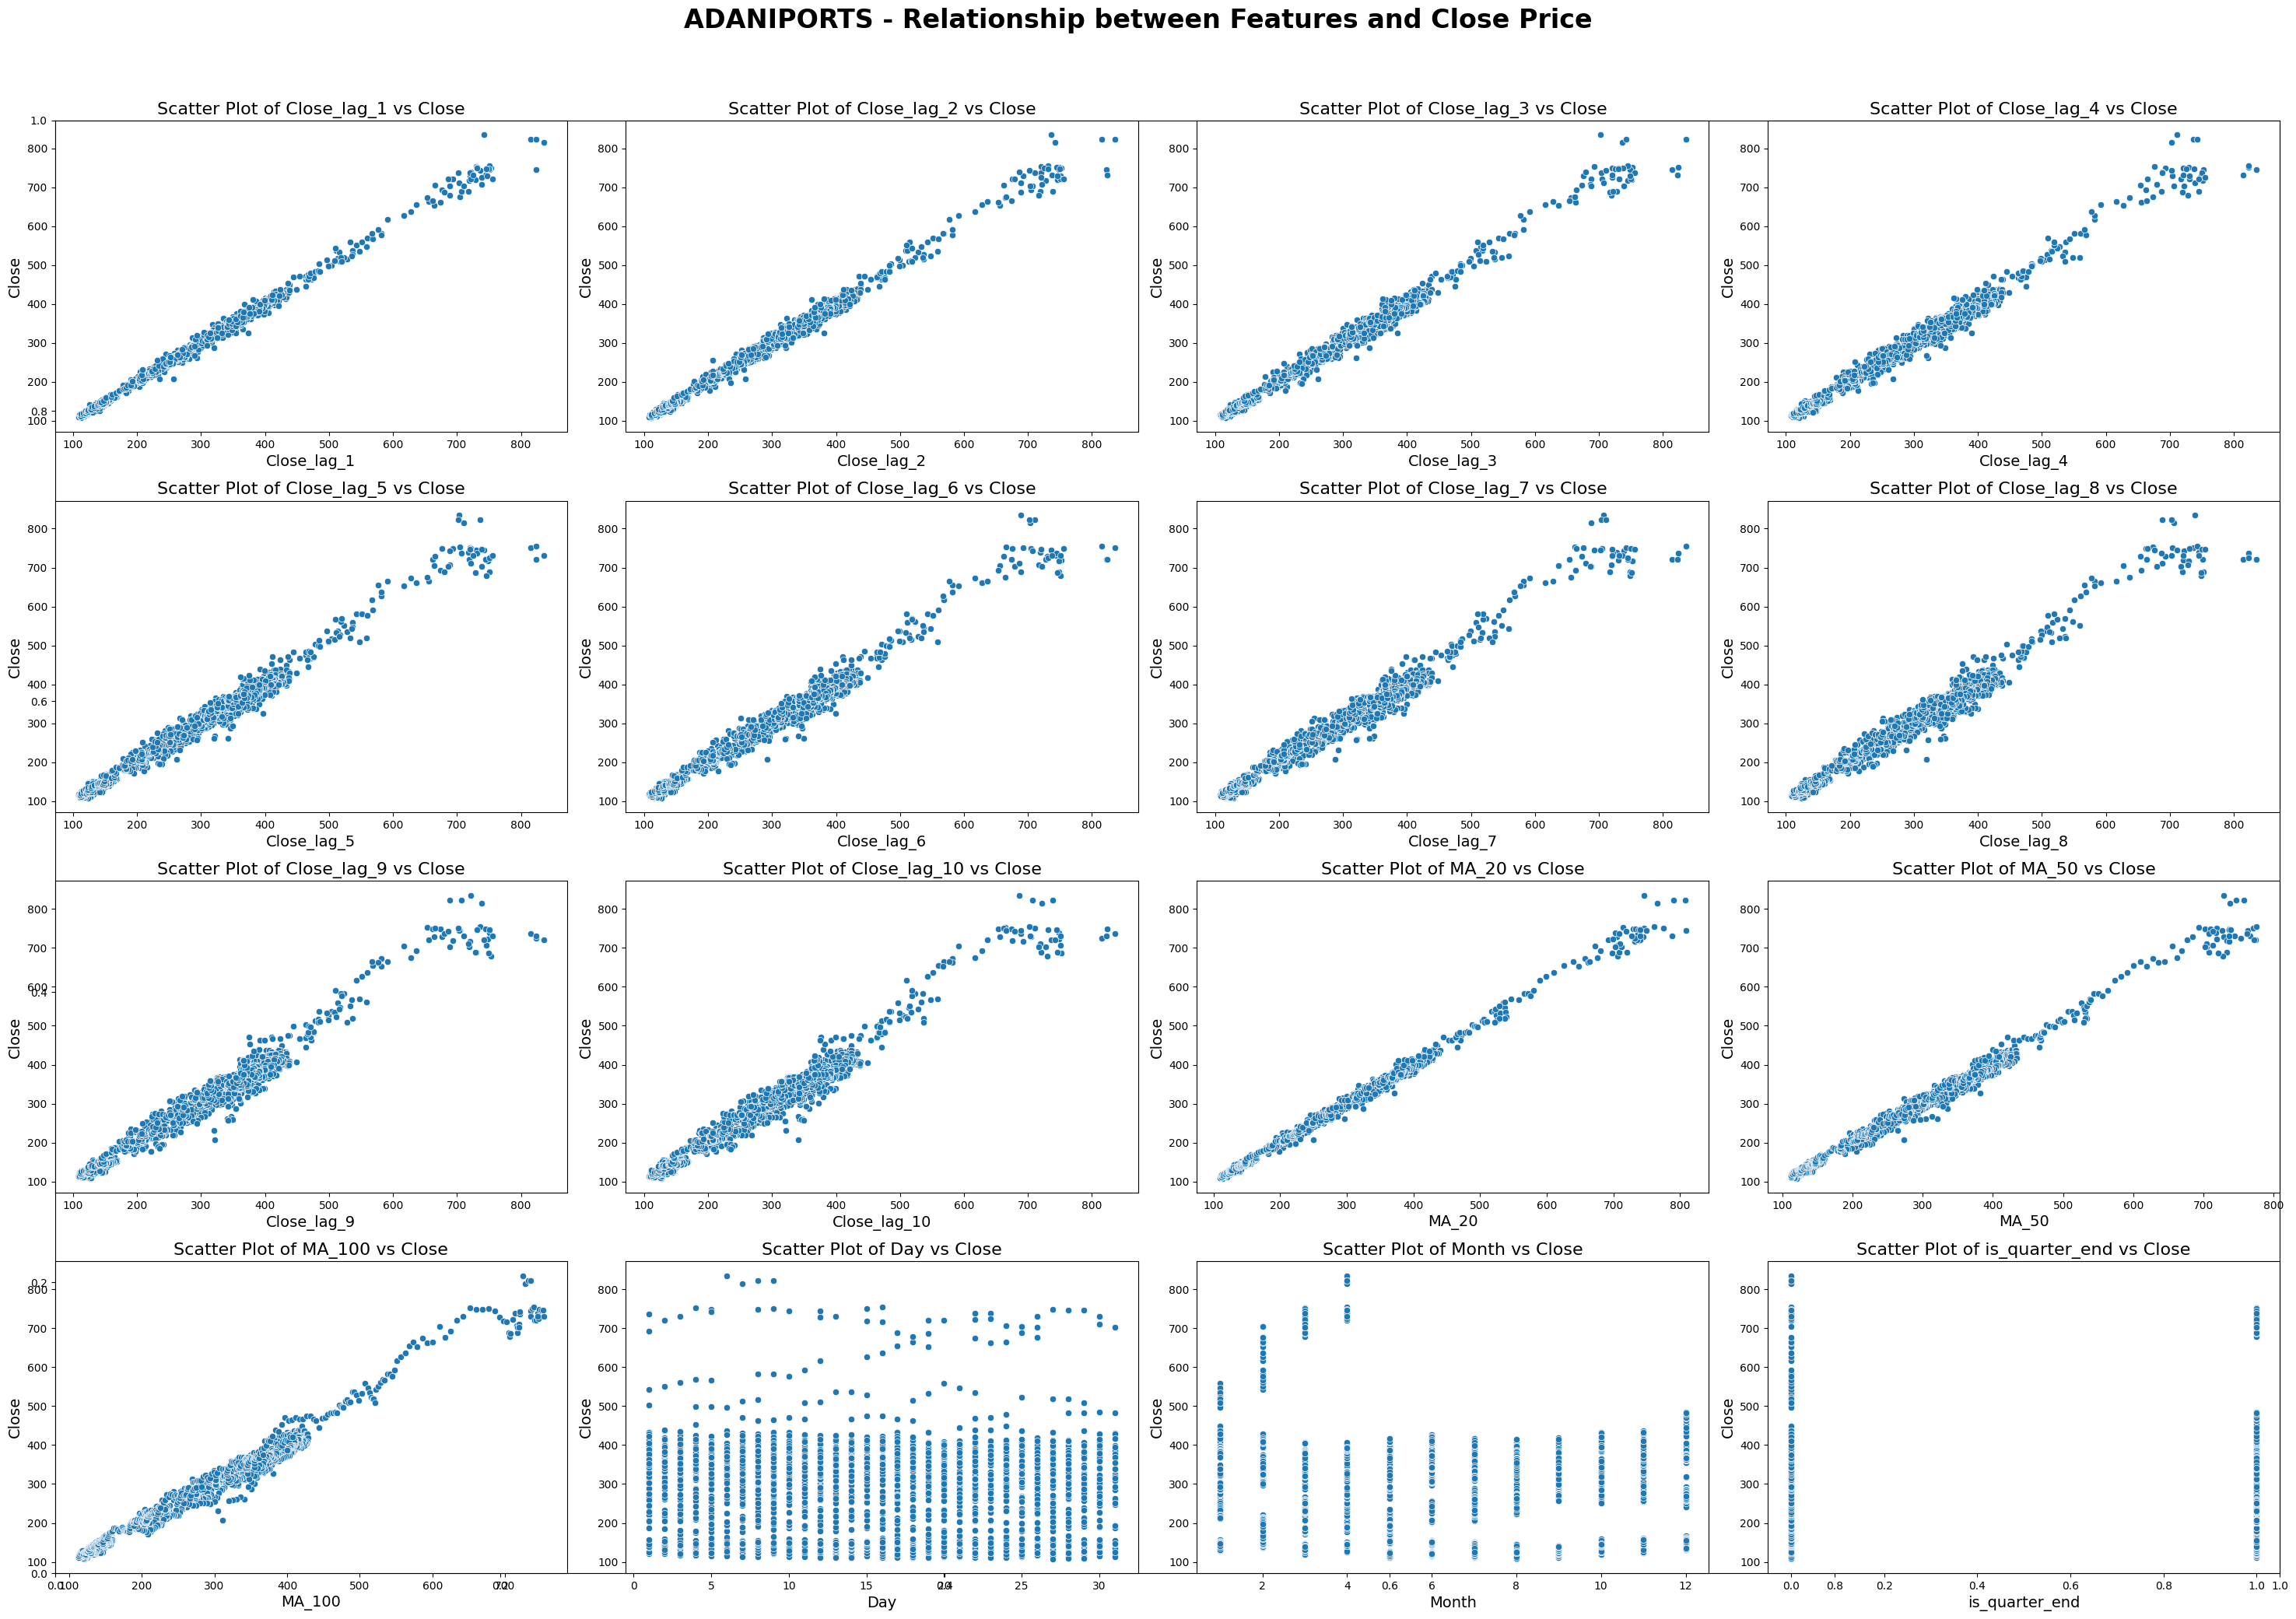

In [ ]:
# Set up the plot area
features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3',
       'Close_lag_4', 'Close_lag_5', 'Close_lag_6', 'Close_lag_7',
       'Close_lag_8', 'Close_lag_9', 'Close_lag_10', 'MA_20', 'MA_50',
       'MA_100', 'Day', 'Month','is_quarter_end']

plt.subplots(figsize=(30, 20))

# Looping through features to create subplots
for i, col in enumerate(features):
    plt.subplot(4, 4, i + 1)  # Create a 2x3 grid for subplots
    sns.scatterplot(x=col, y='Close', data=data_with_features[data_with_features["Symbol"] == 'ADANIPORTS'])  # Scatter plot for continuous data
    plt.title(f'Scatter Plot of {col} vs Close', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Close', fontsize=14)

plt.tight_layout()  # Adjust layout
plt.suptitle('ADANIPORTS - Relationship between Features and Close Price', fontsize=24, fontweight='bold', y=1.05)
plt.show()


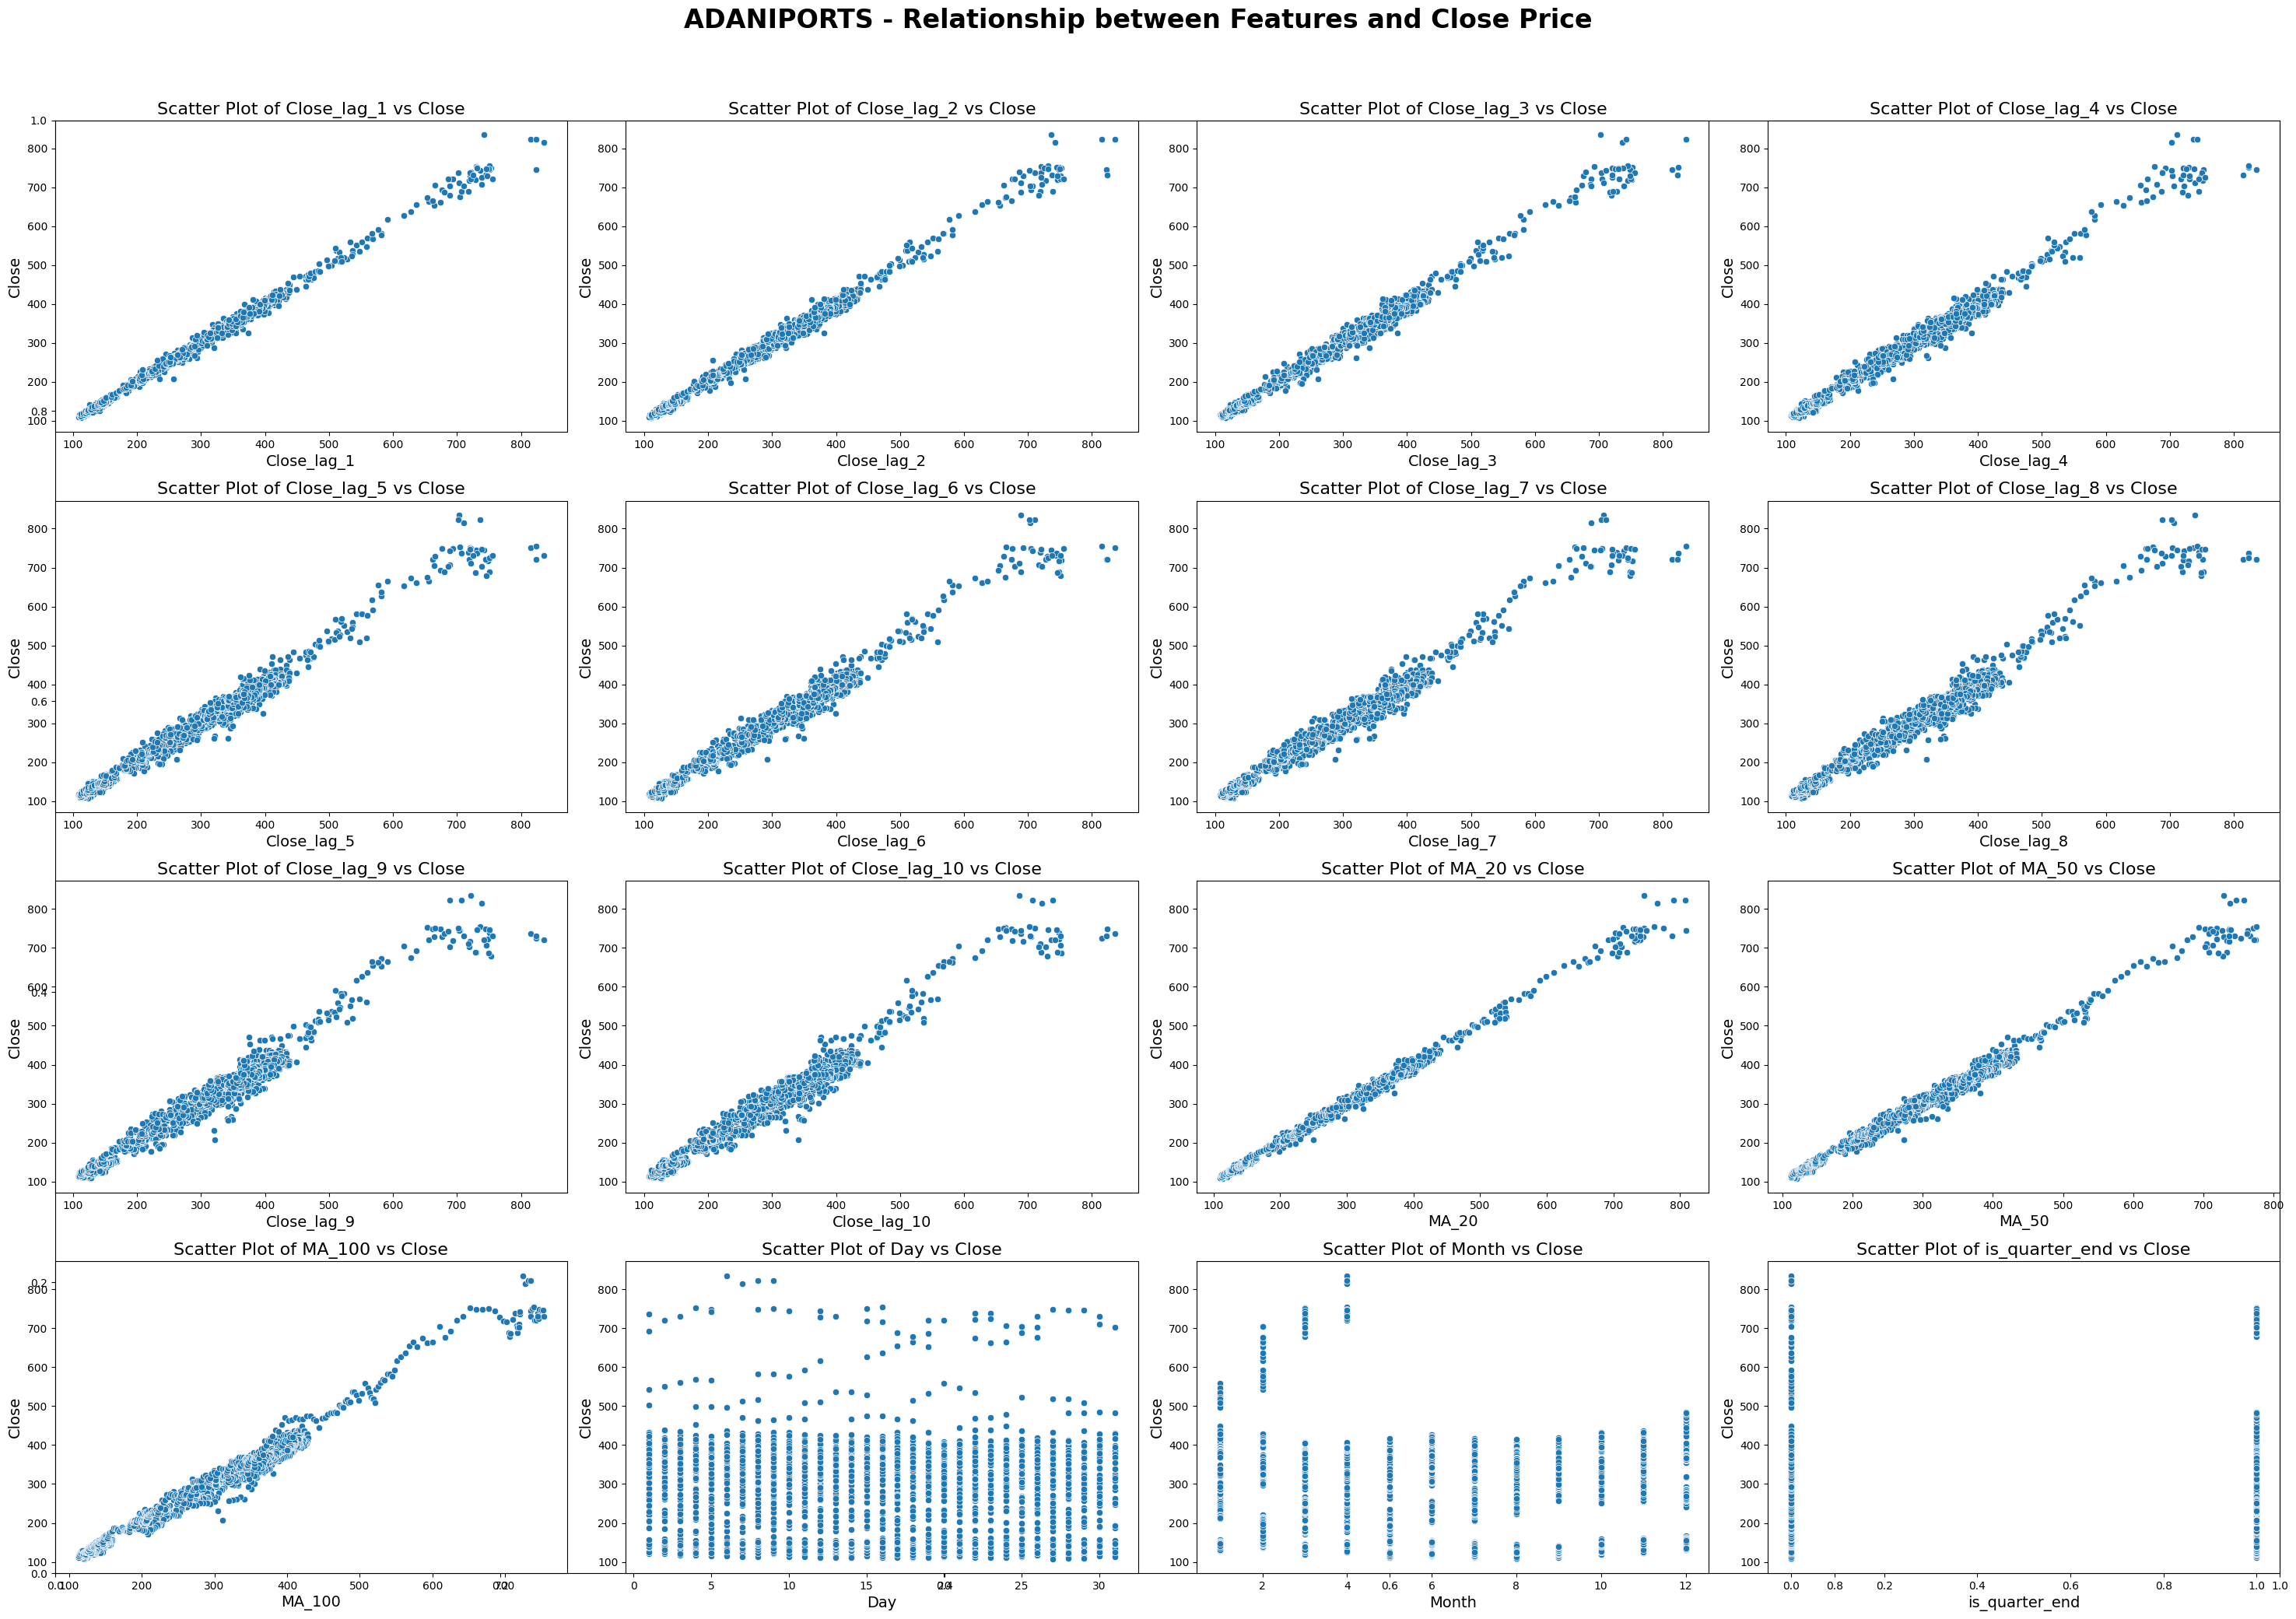

In [ ]:
# Set up the plot area
features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3',
       'Close_lag_4', 'Close_lag_5', 'Close_lag_6', 'Close_lag_7',
       'Close_lag_8', 'Close_lag_9', 'Close_lag_10', 'MA_20', 'MA_50',
       'MA_100', 'Day', 'Month','is_quarter_end']

plt.subplots(figsize=(30, 20))

# Looping through features to create subplots
for i, col in enumerate(features):
    plt.subplot(4, 4, i + 1)  # Create a 2x3 grid for subplots
    sns.scatterplot(x=col, y='Close', data=data_with_features[data_with_features["Symbol"] == 'ADANIPORTS'])  # Scatter plot for continuous data
    plt.title(f'Scatter Plot of {col} vs Close', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Close', fontsize=14)

plt.tight_layout()  # Adjust layout
plt.suptitle('ADANIPORTS - Relationship between Features and Close Price', fontsize=24, fontweight='bold', y=1.05)
plt.show()


In [ ]:
# Confusion Matrix

In [ ]:
data_with_features = data_with_features.drop("is_quarter_end", axis=1)

# Model

In [ ]:
#Data
data_adaniports = data_with_features[data_with_features["Symbol"] == 'ADANIPORTS']
data_asianpaints = data_with_features[data_with_features["Symbol"] == 'ASIANPAINT']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

def train_test(dataset, model, graph_title):
    features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4', 'Close_lag_5',
                'Close_lag_6', 'Close_lag_7', 'Close_lag_8', 'Close_lag_9', 'Close_lag_10',
                'MA_20', 'MA_50', 'MA_100', 'Day', 'Month']

    # Split features and target
    X = dataset[features]
    y = dataset["Close"].values

    # Scale features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()  # Flatten target for ML models

    # Split into training and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Inverse transform predictions and actuals to original scale
    y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1))
    y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))
    y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    # Calculate evaluation metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(dataset.index, scaler_y.inverse_transform(y.reshape(-1, 1)), color='blue', label='Actual Closing Price')

    # Plot predictions for train and test sets
    full_index_train = dataset.index[:train_size]
    full_index_test = dataset.index[train_size:]

    plt.plot(full_index_train, y_pred_train, color='red', label='Predicted Closing Price (Train)', linestyle='--')
    plt.plot(full_index_test, y_pred_test, color='orange', label='Predicted Closing Price (Test)', linestyle='--')

    plt.title(graph_title, fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Closing Price (INR)', fontsize=14)
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


KNN

ADANIPORTS
Training RMSE: 5.1021
Test RMSE: 105.3238
Training MAE: 3.7298
Test MAE: 51.9926


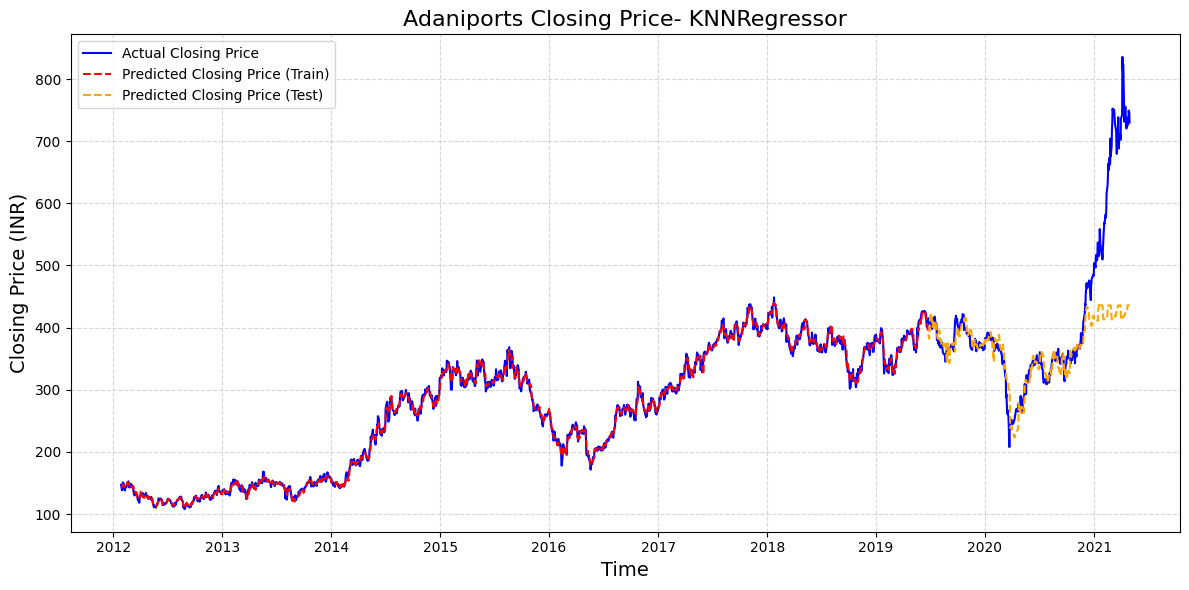

________________________________________________________________________________________________________________________________________________________________________________________________________

ASIANPAINT
Training RMSE: 14.5732
Test RMSE: 424.6694
Training MAE: 10.4727
Test MAE: 310.8320


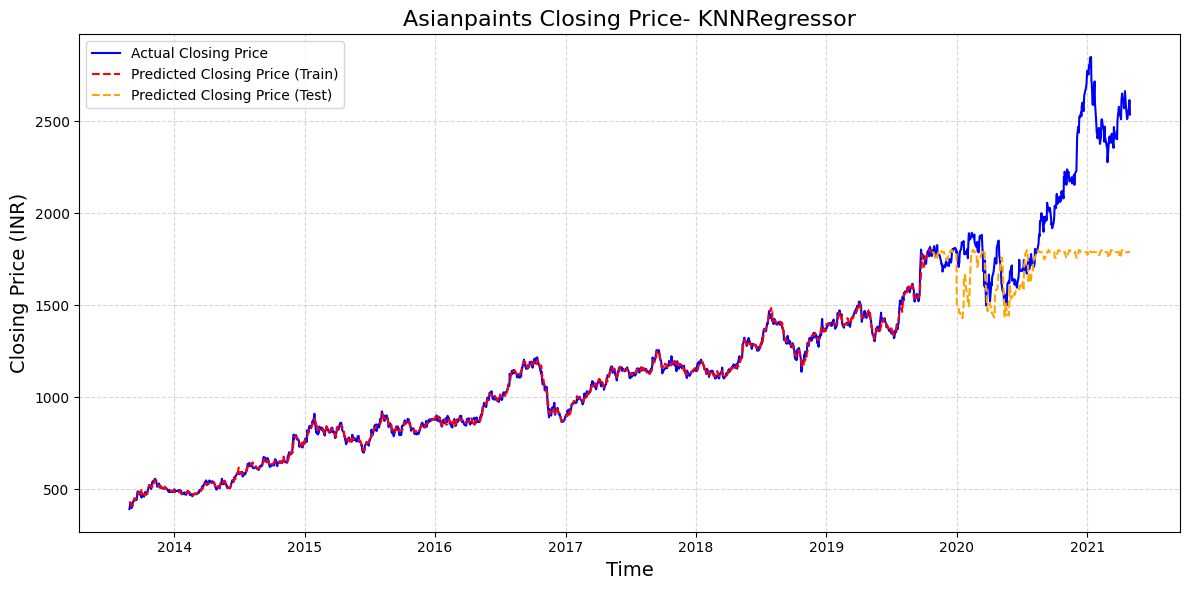

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model_1 = KNeighborsRegressor(n_neighbors=5)
knn_model_2 = KNeighborsRegressor(n_neighbors=5)

print("ADANIPORTS")
train_test(data_adaniports, knn_model_1, "Adaniports Closing Price- KNNRegressor")
print("_"*200,end='\n\n')
print("ASIANPAINT")
train_test(data_asianpaints, knn_model_2, "Asianpaints Closing Price- KNNRegressor")

Linear

In [ ]:
from sklearn.linear_model import LinearRegression

Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

SVM

ADANIPORTS
Training RMSE: 5.7045
Test RMSE: 143.5479
Training MAE: 4.6221
Test MAE: 58.8283


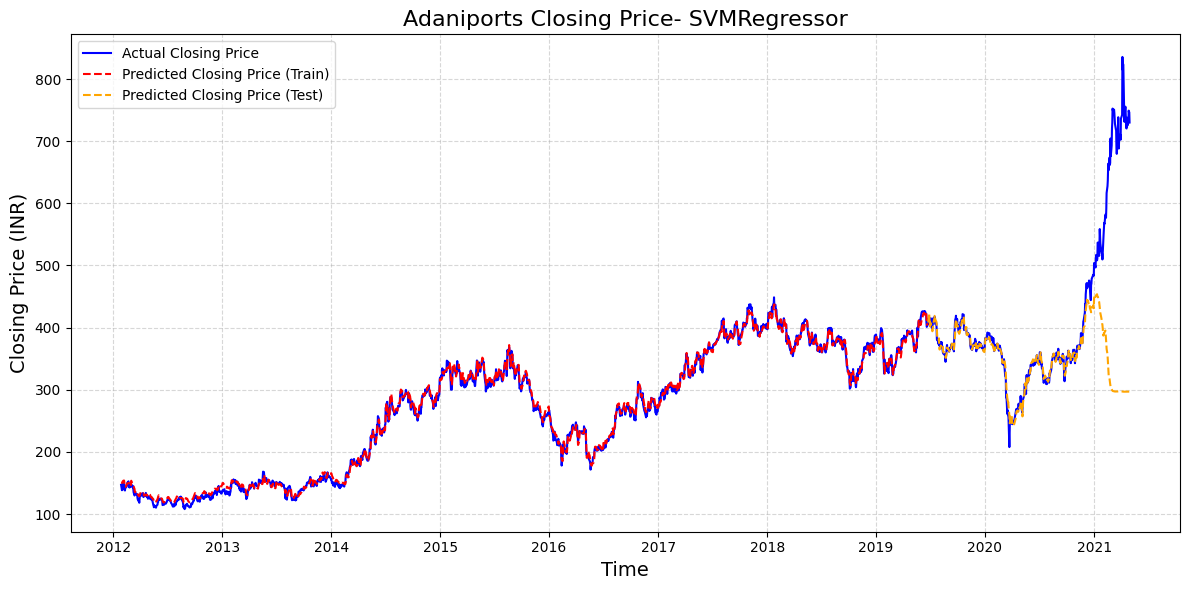

________________________________________________________________________________________________________________________________________________________________________________________________________

ASIANPAINT
Training RMSE: 22.9951
Test RMSE: 847.1554
Training MAE: 18.6761
Test MAE: 630.6851


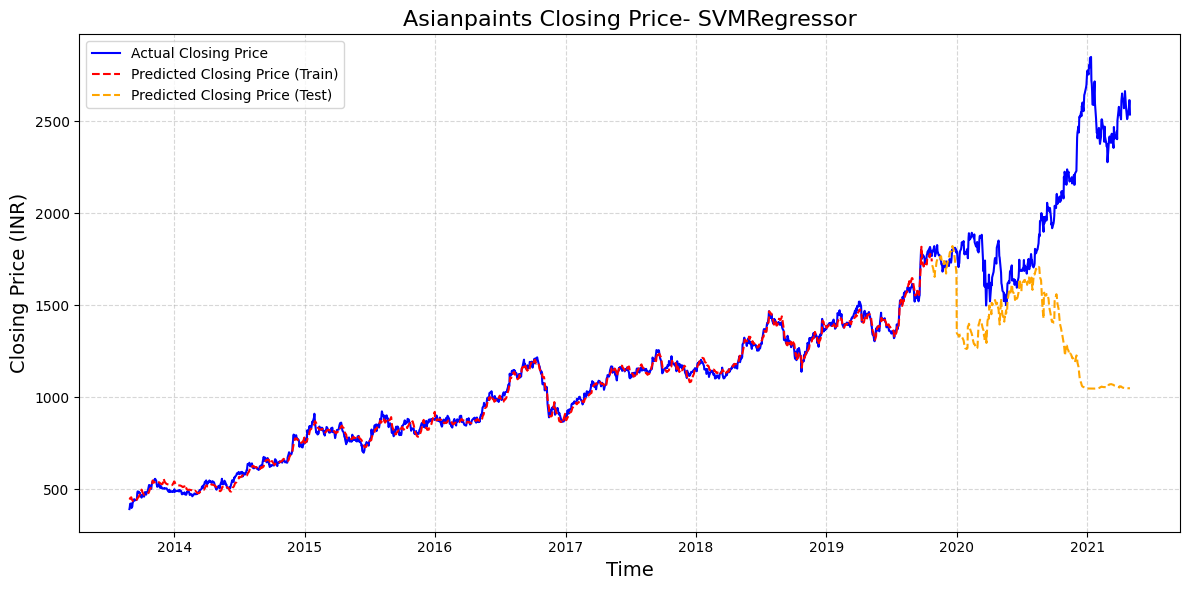

In [ ]:
from sklearn.svm import SVR

svr_1 = SVR(kernel='rbf', C=1000, epsilon=0.1)
svr_2 = SVR(kernel='rbf', C=1000, epsilon=0.1)

print("ADANIPORTS")
train_test(data_adaniports, svr_1, "Adaniports Closing Price- SVMRegressor")
print("_"*200,end='\n\n')
print("ASIANPAINT")
train_test(data_asianpaints, svr_2, "Asianpaints Closing Price- SVMRegressor")

MLP

ADANIPORTS
Training RMSE: 5.2191
Test RMSE: 17.3517
Training MAE: 3.8410
Test MAE: 10.1397


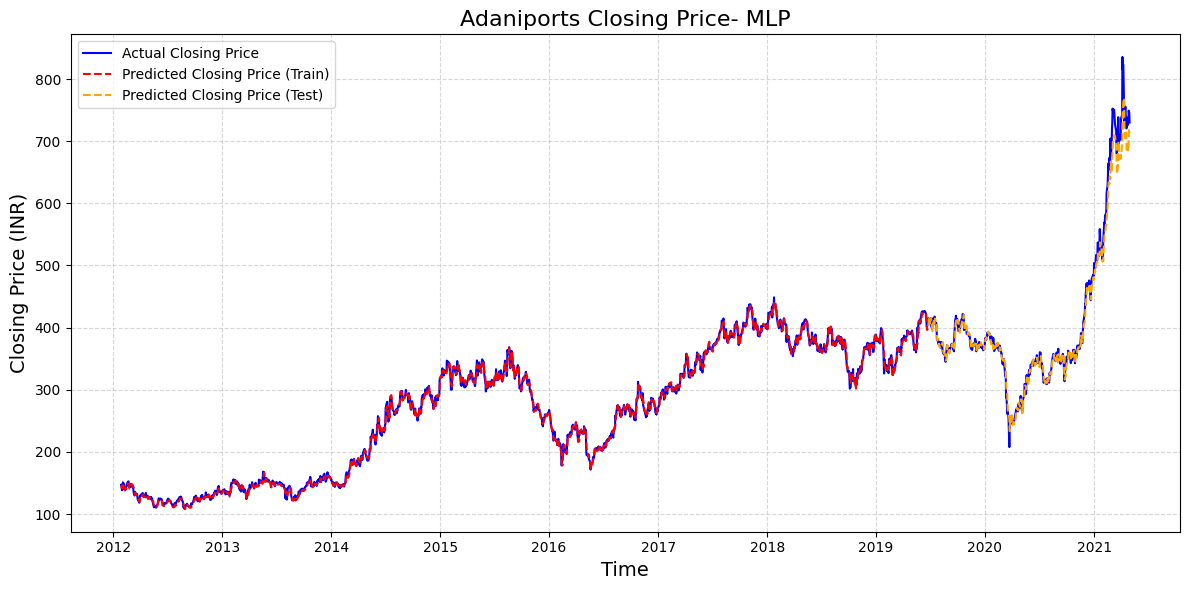

________________________________________________________________________________________________________________________________________________________________________________________________________

ASIANPAINT
Training RMSE: 14.9866
Test RMSE: 125.7205
Training MAE: 11.1233
Test MAE: 93.0798


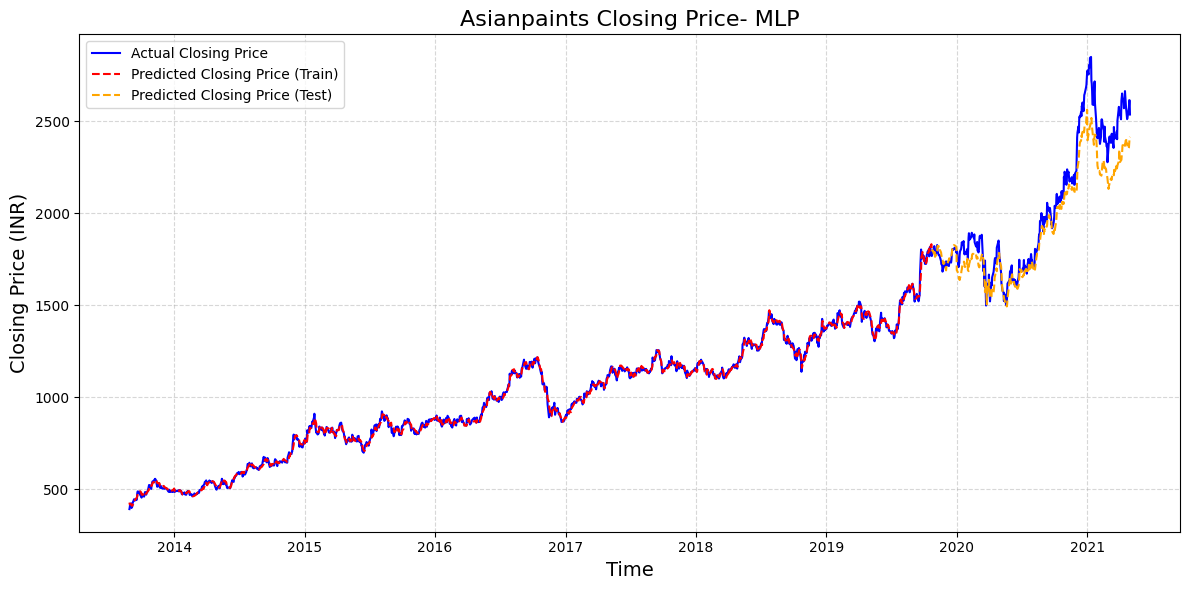

In [ ]:
from sklearn.neural_network import MLPRegressor

nn_model_1 = MLPRegressor(
    hidden_layer_sizes=(150, 100, 50),  # Deeper network structure for better learning capacity
    activation='relu',                  # ReLU generally performs well in regression
    solver='adam',                      # Adam optimizer is robust for noisy data
    learning_rate_init=0.0005,          # Lower learning rate for more precise convergence
    max_iter=5000,                      # Allow more iterations to ensure convergence
    random_state=42,
    early_stopping=True,                # Early stopping to prevent overfitting
    validation_fraction=0.2,            # 20% of training data used for validation
    n_iter_no_change=20                 # Patience for early stopping
)

nn_model_2 = MLPRegressor(
    hidden_layer_sizes=(150, 100, 50),  # Deeper network structure for better learning capacity
    activation='relu',                  # ReLU generally performs well in regression
    solver='adam',                      # Adam optimizer is robust for noisy data
    learning_rate_init=0.0005,          # Lower learning rate for more precise convergence
    max_iter=5000,                      # Allow more iterations to ensure convergence
    random_state=42,
    early_stopping=True,                # Early stopping to prevent overfitting
    validation_fraction=0.2,            # 20% of training data used for validation
    n_iter_no_change=20                 # Patience for early stopping
)

print("ADANIPORTS")
train_test(data_adaniports, nn_model_1, "Adaniports Closing Price- MLP")
print("_"*200,end='\n\n')
print("ASIANPAINT")
train_test(data_asianpaints, nn_model_2, "Asianpaints Closing Price- MLP")

Bagging Model

In [ ]:
from sklearn.ensemble import BaggingRegressor

def bagging_train_test(dataset):
    features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4', 'Close_lag_5',
                'Close_lag_6', 'Close_lag_7', 'Close_lag_8', 'Close_lag_9', 'Close_lag_10',
                'MA_20', 'MA_50', 'MA_100', 'Day', 'Month']

    # Define base models
    base_models = {
        "SVR": SVR(kernel='rbf', C=1000, epsilon=0.1),
        "LinearRegression": LinearRegression(),
        "DecisionTreeRegressor": DecisionTreeRegressor(
                                criterion='squared_error',
                                max_depth=None,
                                min_samples_split=2,
                                random_state=42
                                ),
        "RandomForestRegressor": RandomForestRegressor(
                                n_estimators=100,
                                max_depth=None,
                                min_samples_split=2,
                                random_state=42
                                ),
        "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
        "MLPRegressor": MLPRegressor(
                            hidden_layer_sizes=(150, 100, 50),
                            activation='relu',
                            solver='adam',
                            learning_rate_init=0.001,
                            max_iter=1000,
                            random_state=42,
                            early_stopping=True,
                            validation_fraction=0.2,
                            n_iter_no_change=20
                        )
    }

    # Dictionary to store results
    results = {}

    # Evaluate each base model with Bagging
    for model_name, base_model in base_models.items():
        # Split features and target
        X = dataset[features]
        y = dataset["Close"].values

        # Scale features and target
        scaler_X = StandardScaler()
        scaler_y = StandardScaler()
        X = scaler_X.fit_transform(X)
        y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

        # Split into training and test sets
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=20, random_state=42)
        bagging_model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = bagging_model.predict(X_train)
        y_pred_test = bagging_model.predict(X_test)

        # Inverse transform predictions and actuals to original scale
        y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1))
        y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1))
        y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1))
        y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

        # Calculate evaluation metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        # Store results
        results[model_name] = {
            "Training RMSE": train_rmse,
            "Test RMSE": test_rmse,
            "Training MAE": train_mae,
            "Test MAE": test_mae
        }

    # Identify the best model based on test RMSE
    best_model_name = min(results, key=lambda x: results[x]["Test RMSE"])
    print(f"Best model: {best_model_name} with Test RMSE: {results[best_model_name]['Test RMSE']:.4f}")
    return best_model_name

In [ ]:
best_model={}

for ticker in Tickers:
    data_ticker = data_with_features[data_with_features["Symbol"] == ticker]
    print(f"{ticker}:")
    best_model_name = bagging_train_test(data_ticker)

    best_model[ticker] = {"Model": best_model_name}

ADANIPORTS:


Grid Search for best Model and Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

def Grid_Search_train_test(dataset, regressor):
    features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'Close_lag_4', 'Close_lag_5',
                'Close_lag_6', 'Close_lag_7', 'Close_lag_8', 'Close_lag_9', 'Close_lag_10',
                'MA_20', 'MA_50', 'MA_100', 'Day', 'Month']

    # Split features and target
    X = dataset[features]
    y = dataset["Close"].values

    # Scale features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()


    # Define parameter grid based on regressor type
    if isinstance(regressor, SVR):
        param_grid = {
            'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.01, 0.1, 0.2],
            'gamma': ['scale', 'auto']
        }
    elif isinstance(regressor, KNeighborsRegressor):
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski'],
            'algorithm': ['auto', 'ball_tree']
        }
    elif isinstance(regressor, MLPRegressor):
        param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (150, 100, 50)],
            'activation': ['relu', 'tanh', 'logistic'],
            'alpha': [0.0001, 0.001, 0.01],
        }
    elif isinstance(regressor, LinearRegression):
        param_grid = {}
    elif isinstance(regressor, DecisionTreeRegressor):
        param_grid = {
            'criterion': ['mse', 'friedman_mse', 'mae'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
        }
    elif isinstance(regressor, RandomForestRegressor):
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'random_state': [42]
        }
    else:
        raise ValueError("Unsupported regressor type")

    tscv = TimeSeriesSplit(n_splits=5)
    # Perform grid search
    grid_search = GridSearchCV(
        regressor,
        param_grid,
        cv=tscv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X, y)

    print(f"Best score: {-grid_search.best_score_:.4f} MSE")
    return grid_search.best_params_  # Return the best parameters

for ticker in Tickers:
    data_ticker = data_with_features[data_with_features["Symbol"] == ticker]
    print(f"{ticker}:")

    if best_model[ticker]["Model"] == "SVR":
        model = SVR()
    elif best_model[ticker]["Model"] == "KNeighborsRegressor":
        model = KNeighborsRegressor()
    elif best_model[ticker]["Model"] == "MLPRegressor":
        model = MLPRegressor(learning_rate_init=0.01 ,random_state=42, max_iter=500)
    elif best_model[ticker]["Model"] == "LinearRegression":
        model = LinearRegression()
    elif best_model[ticker]["Model"] == "DecisionTreeRegressor":
        model = DecisionTreeRegressor()
    elif best_model[ticker]["Model"] == "RandomForestRegressor":
        model = RandomForestRegressor()

    best_params = Grid_Search_train_test(data_ticker, model)
    best_model[ticker]["Model_params"] = best_params
    print(f"Best parameters: {best_params}\n")

ADANIPORTS:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best score: 0.0130 MSE
Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}

ASIANPAINT:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best score: 0.0036 MSE
Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}

AXISBANK:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best score: 0.0255 MSE
Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}

BAJAJ-AUTO:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best score: 0.0111 MSE
Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}

BAJAJFINSV:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best score: 0.0093 MSE
Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

BAJFINANCE:
Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best sc

In [ ]:
best_model

{'ADANIPORTS': {'Model': 'MLPRegressor',
  'Model_params': {'activation': 'relu',
   'alpha': 0.01,
   'hidden_layer_sizes': (100,)}},
 'ASIANPAINT': {'Model': 'MLPRegressor',
  'Model_params': {'activation': 'tanh',
   'alpha': 0.01,
   'hidden_layer_sizes': (100,)}},
 'AXISBANK': {'Model': 'MLPRegressor',
  'Model_params': {'activation': 'tanh',
   'alpha': 0.01,
   'hidden_layer_sizes': (100,)}},
 'BAJAJ-AUTO': {'Model': 'MLPRegressor',
  'Model_params': {'activation': 'tanh',
   'alpha': 0.01,
   'hidden_layer_sizes': (100,)}},
 'BAJAJFINSV': {'Model': 'MLPRegressor',
  'Model_params': {'activation': 'relu',
   'alpha': 0.0001,
   'hidden_layer_sizes': (100, 100)}},
 'BAJFINANCE': {'Model': 'MLPRegressor',
  'Model_params': {'activation': 'tanh',
   'alpha': 0.01,
   'hidden_layer_sizes': (100,)}},
 'BHARTIARTL': {'Model': 'MLPRegressor',
  'Model_params': {'activation': 'tanh',
   'alpha': 0.01,
   'hidden_layer_sizes': (100,)}},
 'BPCL': {'Model': 'MLPRegressor',
  'Model_params'

LSTM - Deep Learning Model

ADANIPORTS
Epoch 1/100
46/46 [==============================] - 29s 160ms/step - loss: 0.0747 - val_loss: 0.0234
Epoch 2/100
46/46 [==============================] - 2s 49ms/step - loss: 0.0146 - val_loss: 0.0122
Epoch 3/100
46/46 [==============================] - 3s 59ms/step - loss: 0.0143 - val_loss: 0.0118
Epoch 4/100
46/46 [==============================] - 3s 61ms/step - loss: 0.0145 - val_loss: 0.0110
Epoch 5/100
46/46 [==============================] - 3s 64ms/step - loss: 0.0132 - val_loss: 0.0124
Epoch 6/100
46/46 [==============================] - 3s 71ms/step - loss: 0.0122 - val_loss: 0.0167
Epoch 7/100
46/46 [==============================] - 3s 71ms/step - loss: 0.0127 - val_loss: 0.0140
Epoch 8/100
46/46 [==============================] - 3s 61ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 9/100
46/46 [==============================] - 3s 59ms/step - loss: 0.0105 - val_loss: 0.0108
Epoch 10/100
46/46 [==============================] - 3s 71ms/step - loss: 0.0113 - val

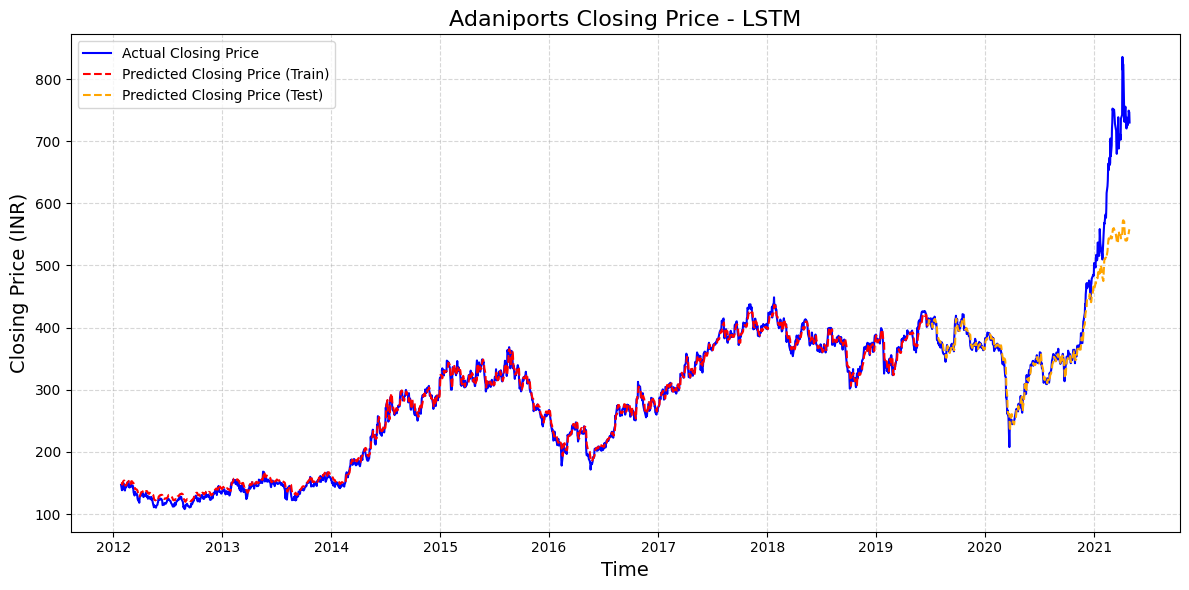

________________________________________________________________________________________________________________________________________________________________________________________________________

ASIANPAINT
Epoch 1/100
46/46 [==============================] - 27s 165ms/step - loss: 0.2257 - val_loss: 0.0154
Epoch 2/100
46/46 [==============================] - 3s 71ms/step - loss: 0.0610 - val_loss: 0.0023
Epoch 3/100
46/46 [==============================] - 3s 74ms/step - loss: 0.0540 - val_loss: 0.0029
Epoch 4/100
46/46 [==============================] - 3s 69ms/step - loss: 0.0429 - val_loss: 0.0036
Epoch 5/100
46/46 [==============================] - 3s 72ms/step - loss: 0.0440 - val_loss: 0.0013
Epoch 6/100
46/46 [==============================] - 3s 65ms/step - loss: 0.0395 - val_loss: 0.0013
Epoch 7/100
46/46 [==============================] - 3s 62ms/step - loss: 0.0357 - val_loss: 0.0013
Epoch 8/100
46/46 [==============================] - 3s 62ms/step - loss: 0.0388 - va

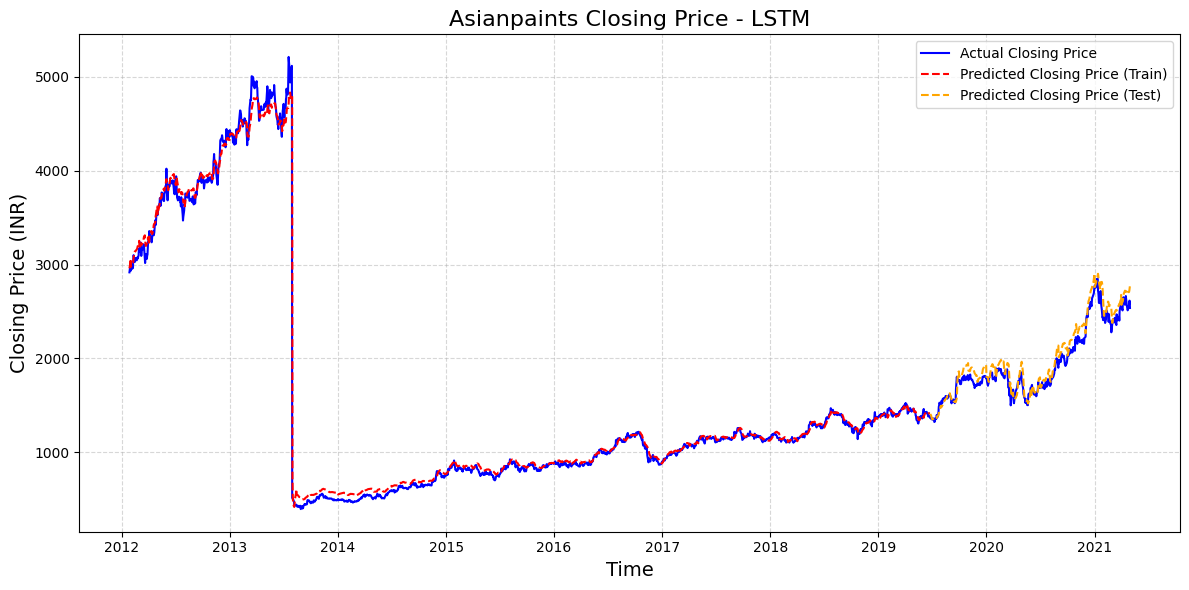

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def LSTM_train_test(dataset, graph_title):
    features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3',
                'Close_lag_4', 'Close_lag_5', 'Close_lag_6',
                'Close_lag_7', 'Close_lag_8', 'Close_lag_9',
                'Close_lag_10', 'MA_20', 'MA_50', 'MA_100', 'Day', 'Month']

    X = dataset[features]
    y = dataset["Close"].values

    # Scale both features and target
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1))

    X = X.reshape((X.shape[0], X.shape[1], 1))

    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential([
        Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.2),
        Bidirectional(LSTM(32)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                        callbacks=[early_stopping], verbose=1)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Inverse transform predictions
    y_pred_train = scaler_y.inverse_transform(y_pred_train)
    y_pred_test = scaler_y.inverse_transform(y_pred_test)
    y_train = scaler_y.inverse_transform(y_train)
    y_test = scaler_y.inverse_transform(y_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    plt.figure(figsize=(12, 6))
    plt.plot(dataset.index, scaler_y.inverse_transform(y), color='blue', label='Actual Closing Price')

    full_index_train = dataset.index[:train_size]
    full_index_test = dataset.index[train_size:]

    plt.plot(full_index_train, y_pred_train, color='red', label='Predicted Closing Price (Train)', linestyle='--')
    plt.plot(full_index_test, y_pred_test, color='orange', label='Predicted Closing Price (Test)', linestyle='--')

    plt.title(graph_title, fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Closing Price (INR)', fontsize=14)
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Running the function
print("ADANIPORTS")
LSTM_train_test(data_adaniports, "Adaniports Closing Price - LSTM")
print("_" * 200, end='\n\n')
print("ASIANPAINT")
LSTM_train_test(data_asianpaints, "Asianpaints Closing Price - LSTM")